In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as mticker
import seaborn as sns
import os
import math

In [2]:
DATA_DIR = os.path.join("..", "..")
DATA_DIR = os.path.join(DATA_DIR, "Data")
EEG_DIR = os.path.join(DATA_DIR, "EEG4")
CH_DIR = os.path.join(DATA_DIR, "CH2")
FIGURES_DIR = os.path.join("Figures", "EEG_CH")

In [3]:
filename = os.path.join(EEG_DIR, "EEG_all_60.csv")
df_eeg = pd.read_csv(filename, sep=' ')

filename = os.path.join(CH_DIR, "CH_all.csv")
df_ch = pd.read_csv(filename, sep=' ')

In [4]:
def two_scales(ax1, ax2, index1, index2, data1, data2, y_label1, y_label2):
    #ax2 = ax2.twinx()
    
    lns1 = ax1.plot(index1, data1, color='b', linestyle = '--')
    lns2 = ax2.plot(index2, data2, color='r')
        
    lns = lns1 +  lns2
    ax2.legend(lns, [y_label1,y_label2], loc='best')
    
    ax1.set_xticklabels([])
        
    ax1.set_ylabel(y_label1)
    
    yint = range(min(data2), math.ceil(max(data2))+1)
    ax2.yaxis.set_major_locator(mticker.FixedLocator(yint))
    ax2.set_yticklabels(list(yint))
    
    ax2.set_ylabel(y_label2)
    
    for t in ax1.get_yticklabels():
        t.set_color('b')
        
    for t in ax2.get_yticklabels():
        t.set_color('r')

In [5]:
def plot_eeg_ch(df_high_eeg, df_high_ch, metric, fig_name, title=""):
    plt.rcParams["figure.figsize"] = (15,6)
    plt.rcParams.update({'font.size': 22})

    fig=plt.figure()
    
    ax1=fig.add_subplot()
    ax2=fig.add_subplot(frame_on=False)
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position('right') 
    
    eeg_index = df_high_eeg['timeInterval'].tolist()
    ch_index = (df_high_ch['timeInterval']*3).tolist()
    
    two_scales(ax1, ax2, eeg_index, ch_index, df_high_eeg['WorkloadMean'], df_high_ch["score"], 'Workload', 'CH')

    plt.title(title)
    plt.tight_layout()
    
    
    plt.savefig(os.path.join(FIGURES_DIR, fig_name + '.png'))

In [6]:
run_dict = {
    # index - low(0), medium(1), high(2) scenarios
    # value - run number
    'MO':[1, 2, 3],
    'EI':[3, 2, 1],
    'KV':[3, 2, 1],
    'UO':[1, 2, 3],
    'KB':[1, 3, 2],
    'PF':[2, 3, 1],
    'AL':[3, 1, 2],
    'IH':[1, 3, 2],
    'RI':[2, 1, 3],
    'JO':[2, 3, 1],
    'AE':[3, 1, 2],
    'HC':[2, 1, 3],
    'LS':[3, 1, 2],
    'ML':[1, 3, 2],
    'AP':[1, 3, 2],
    'AK':[3, 1, 2],
    'RE':[2, 3, 1],
    'SV':[3, 2, 1]
    }

C:\Users\anale19\AppData\Local\Temp\ipykernel_3508\63338992.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig=plt.figure()


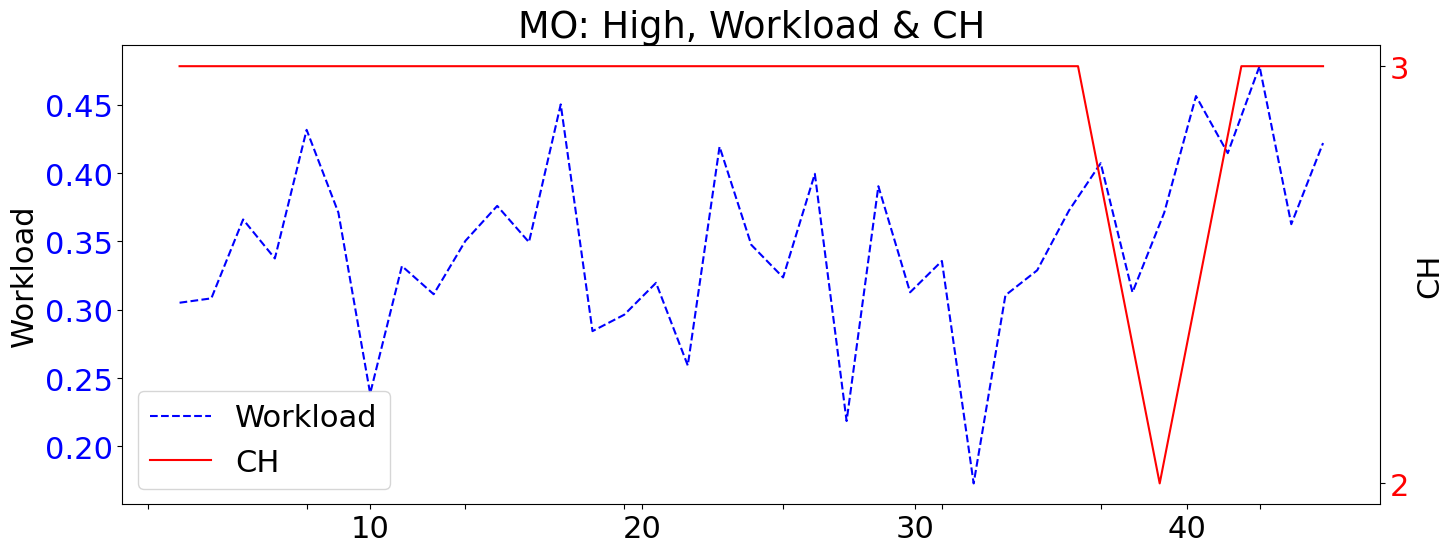

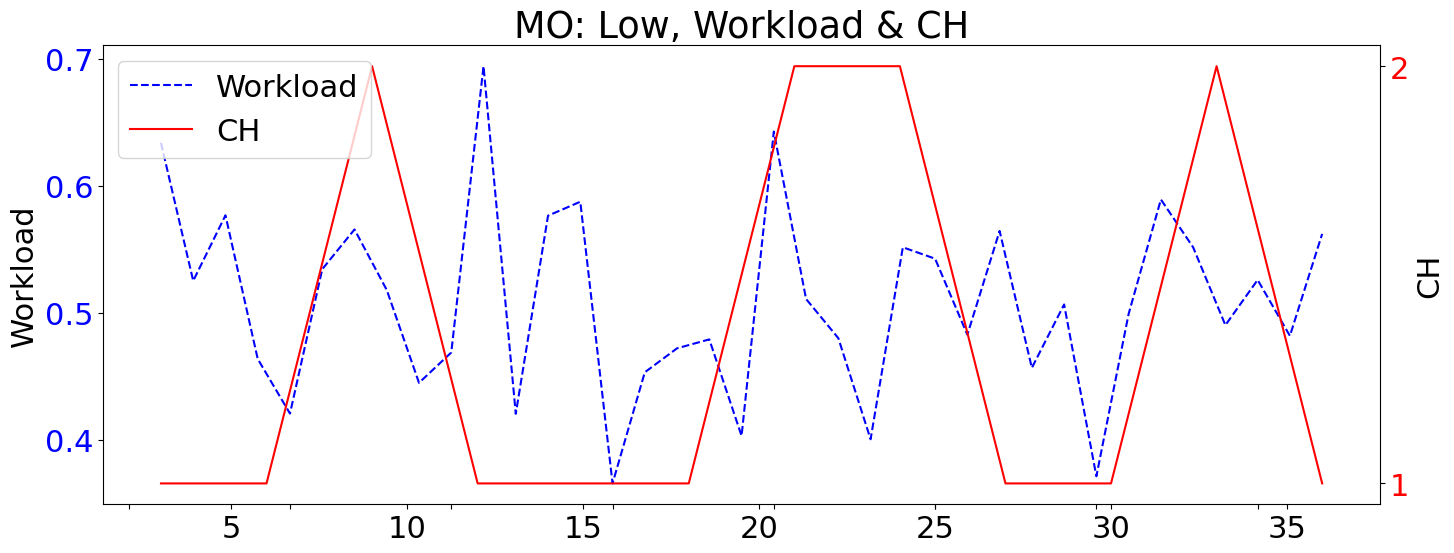

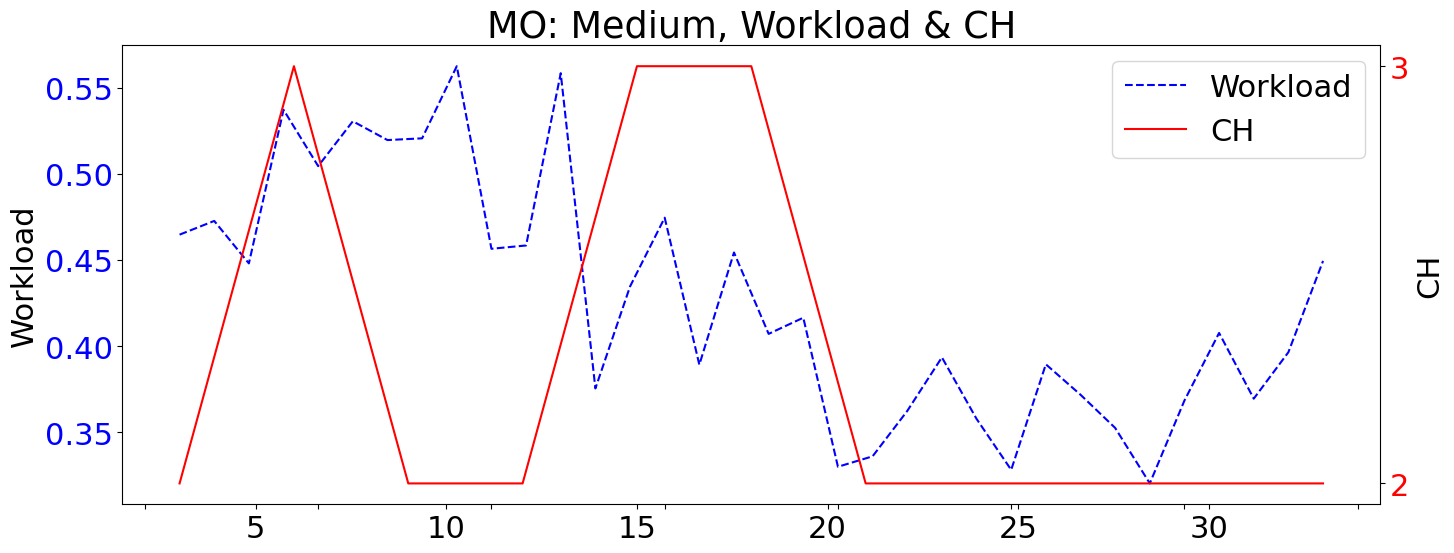

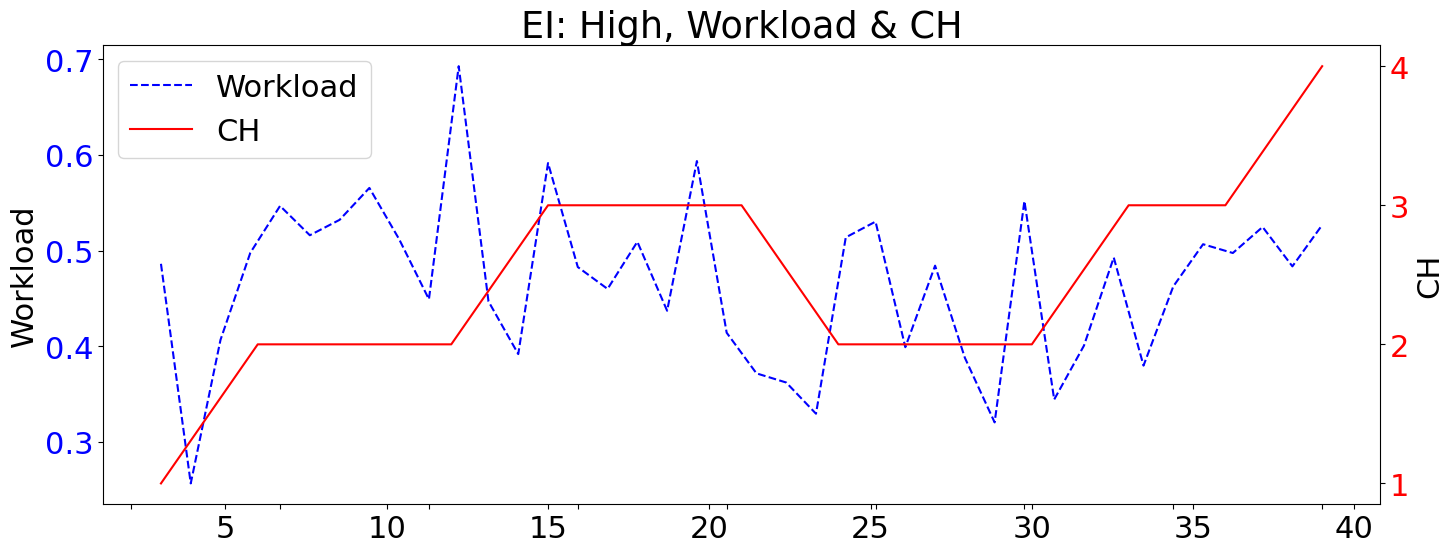

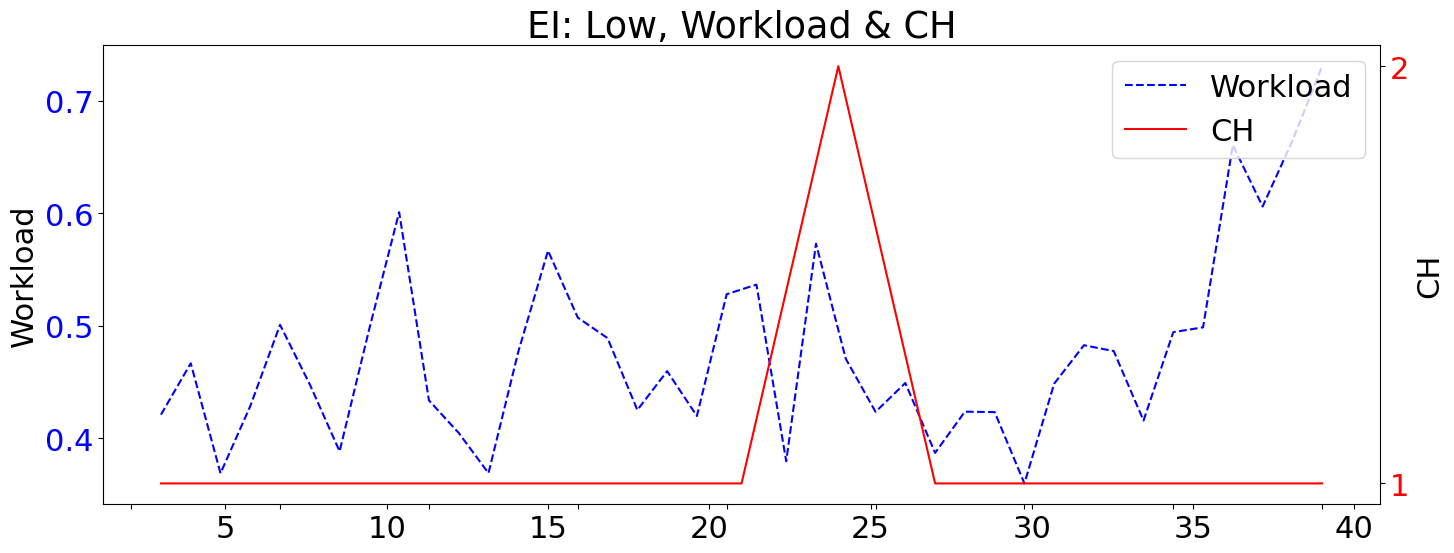

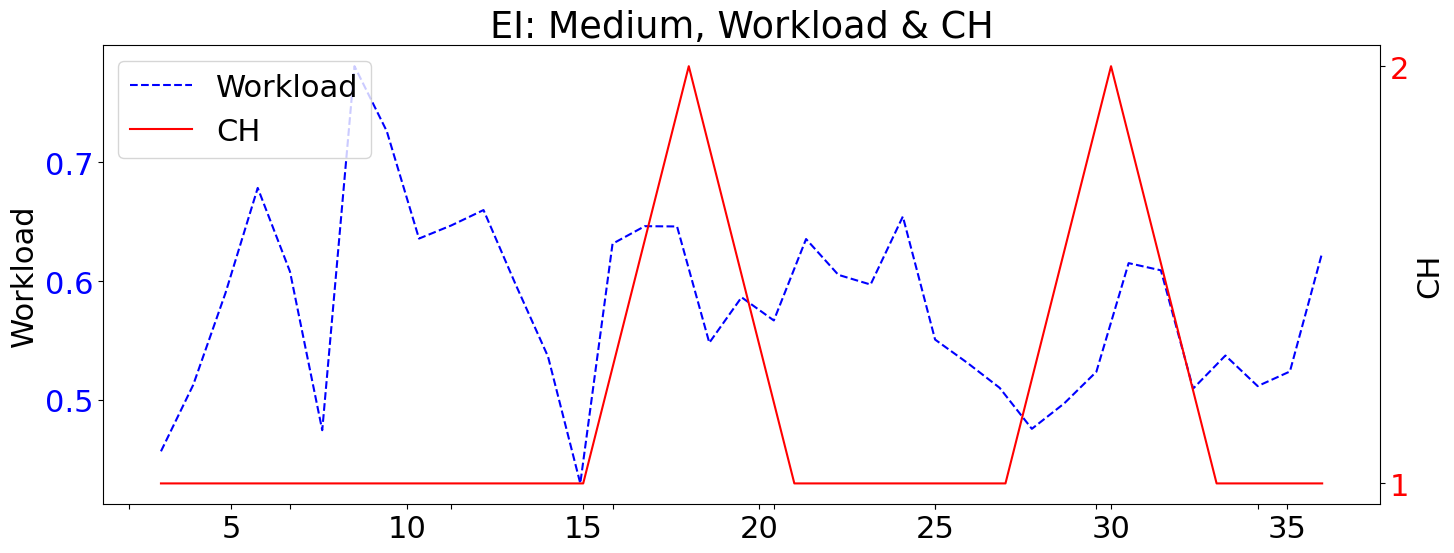

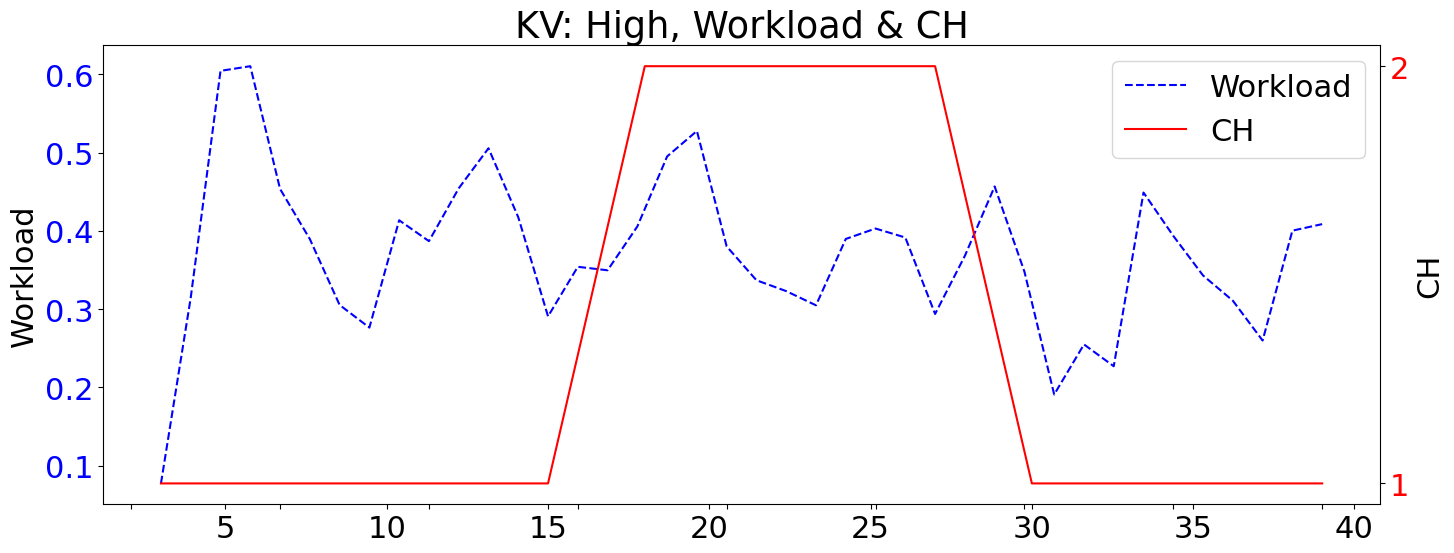

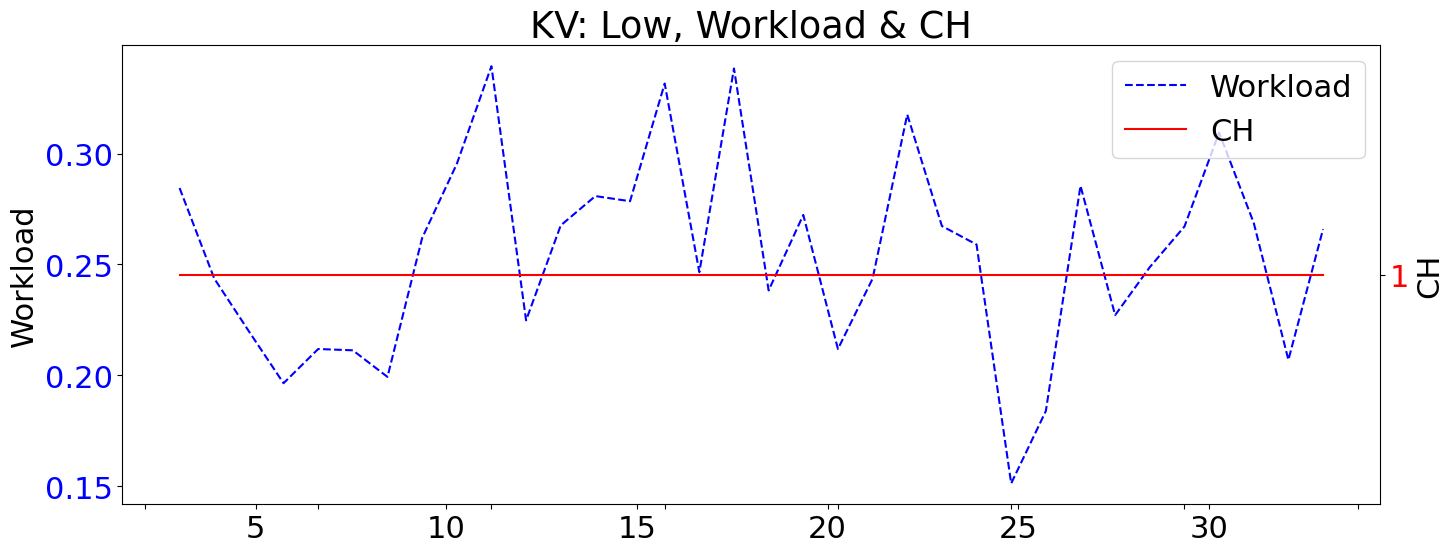

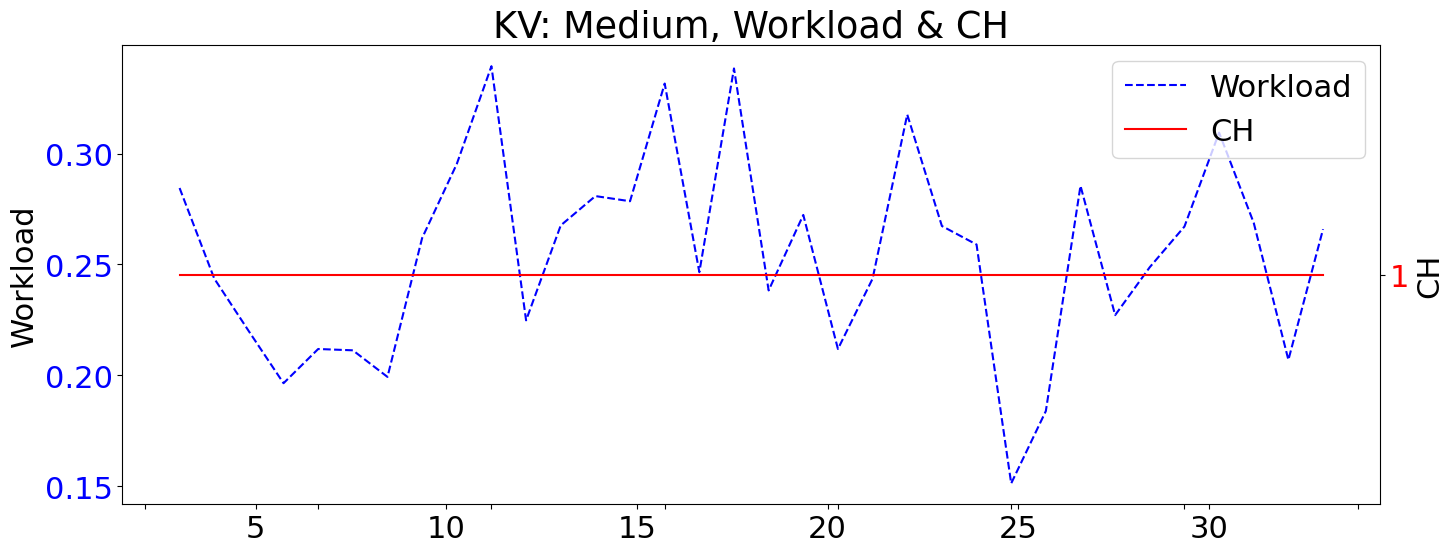

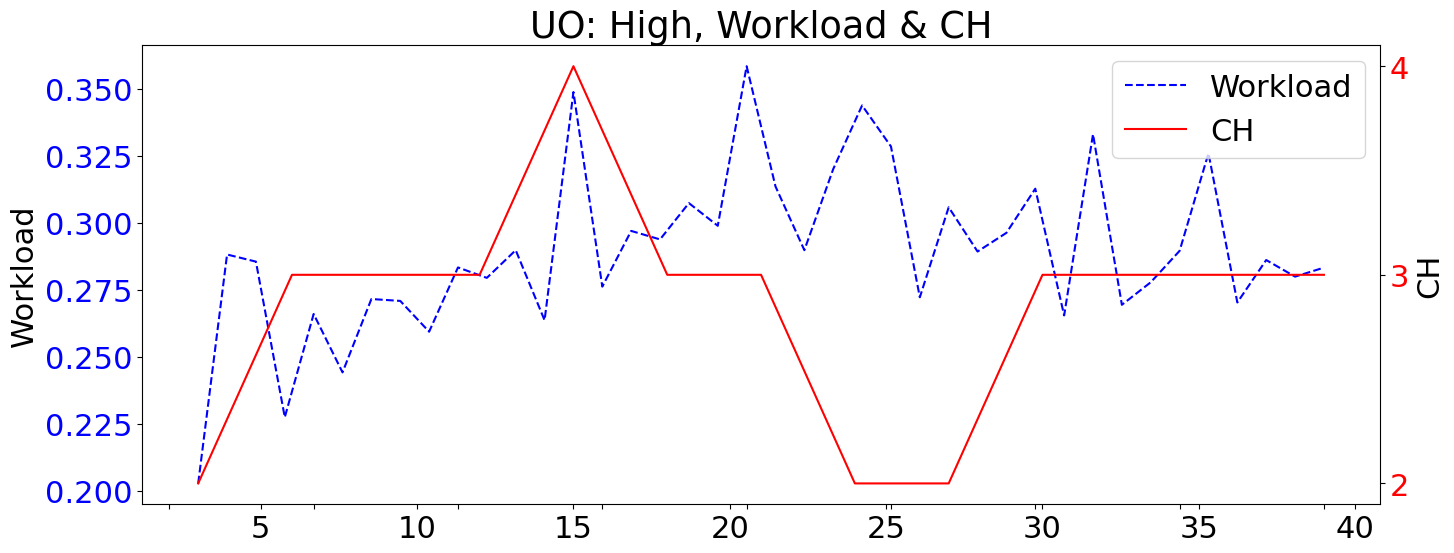

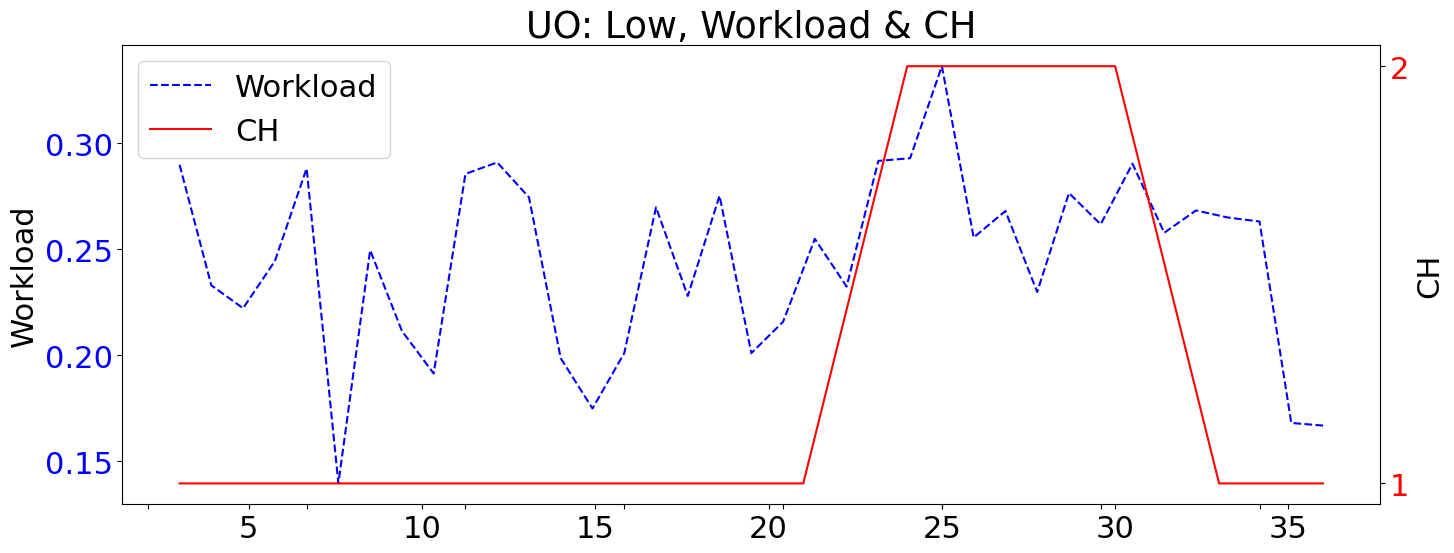

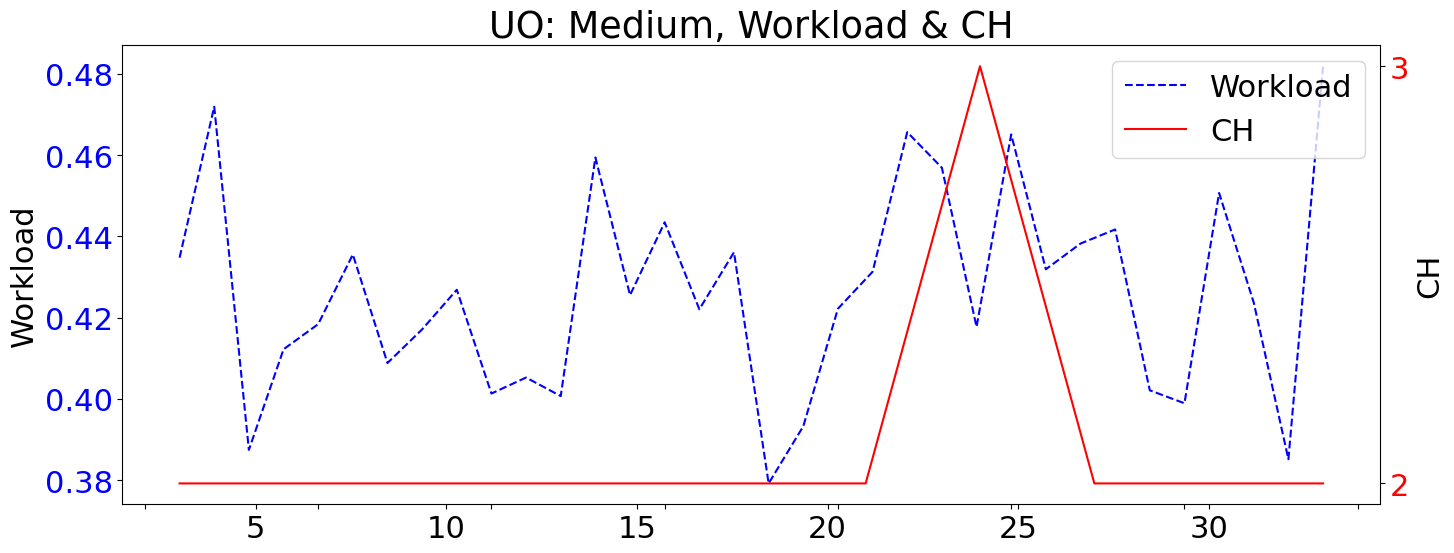

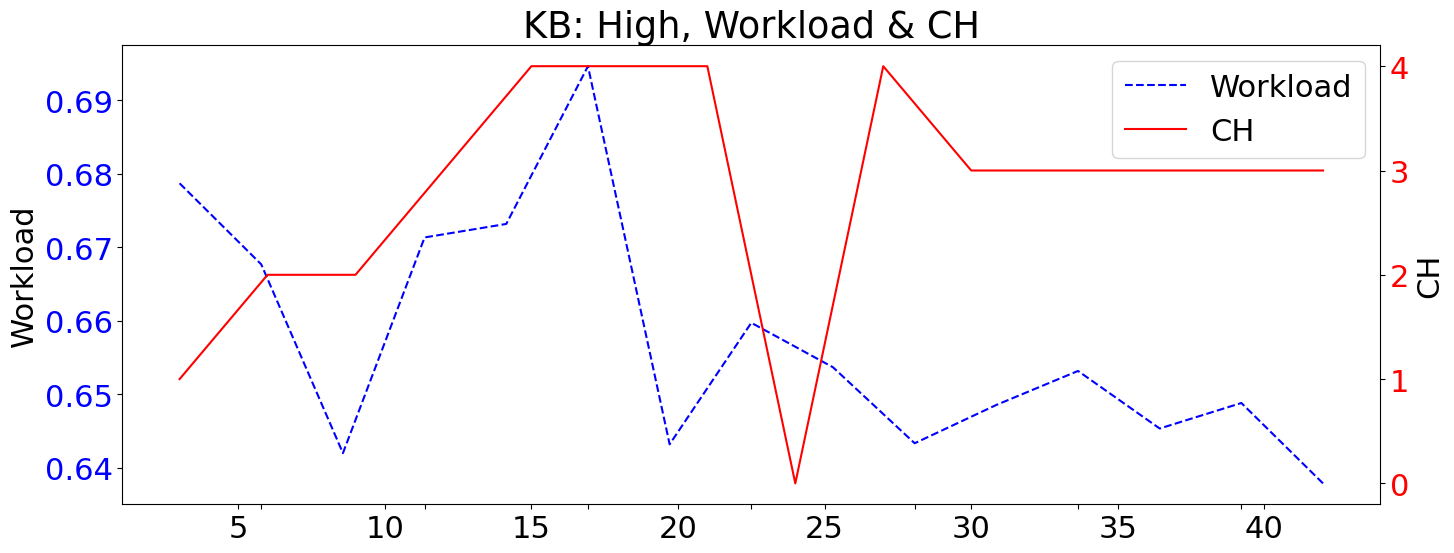

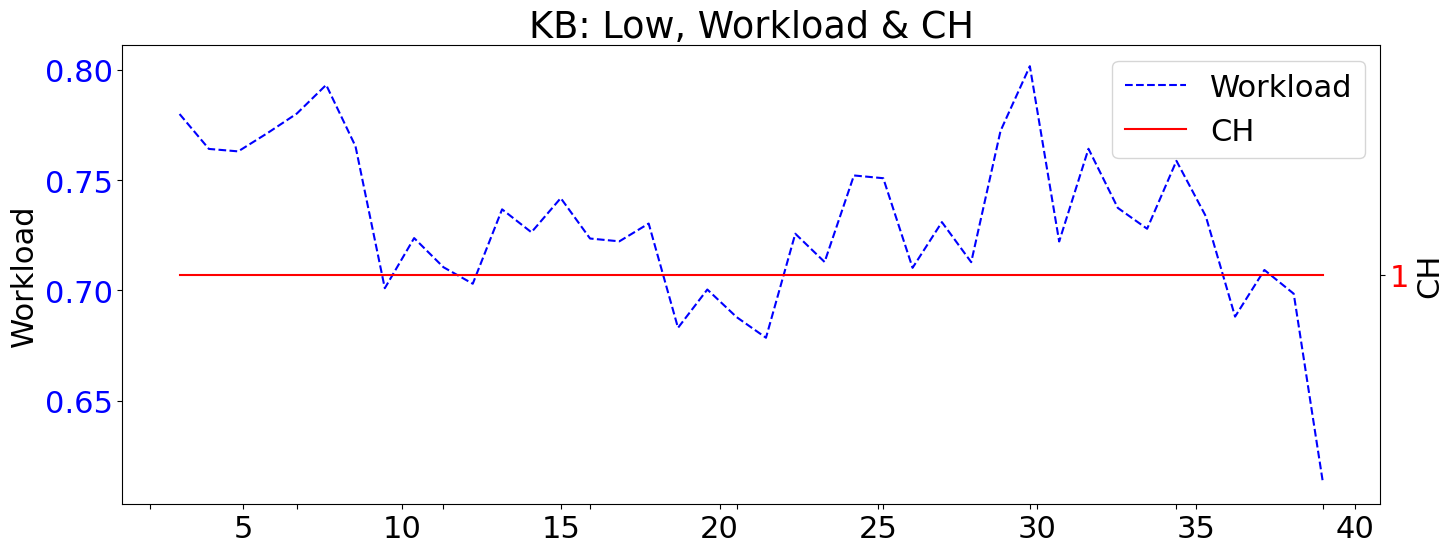

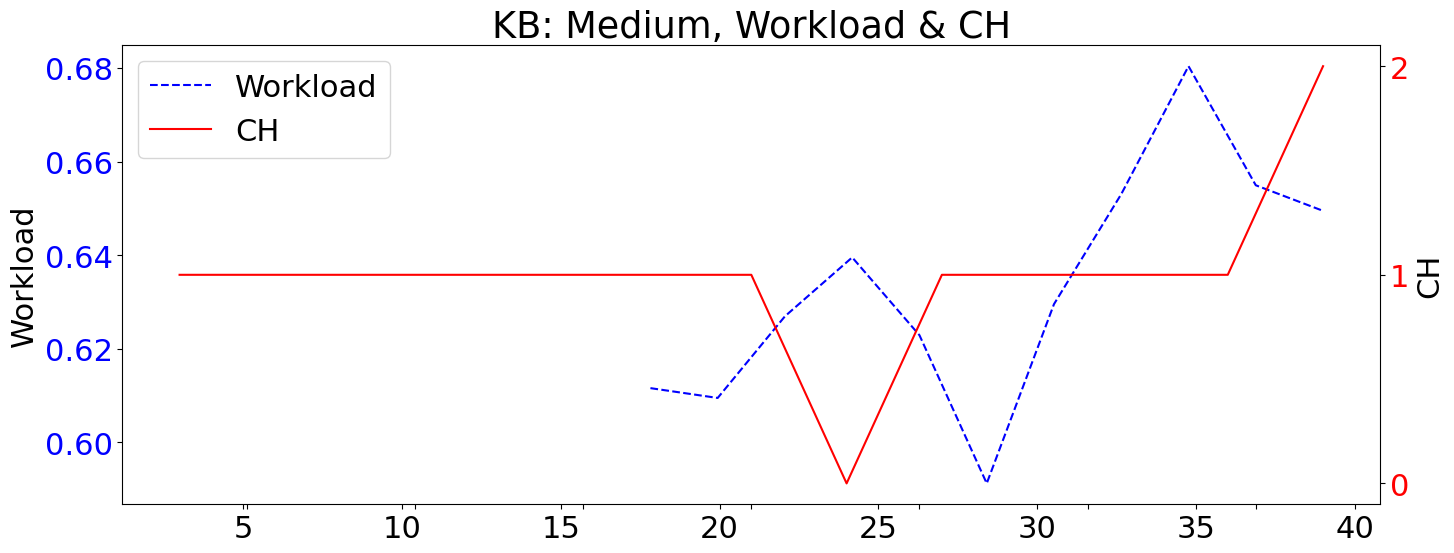

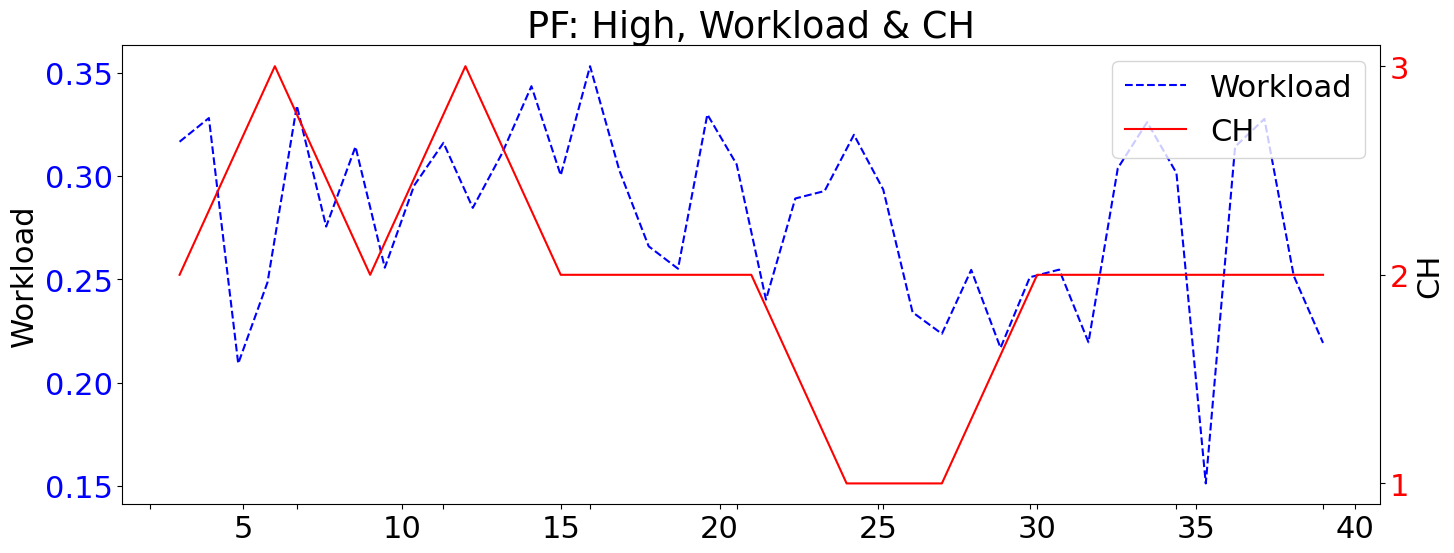

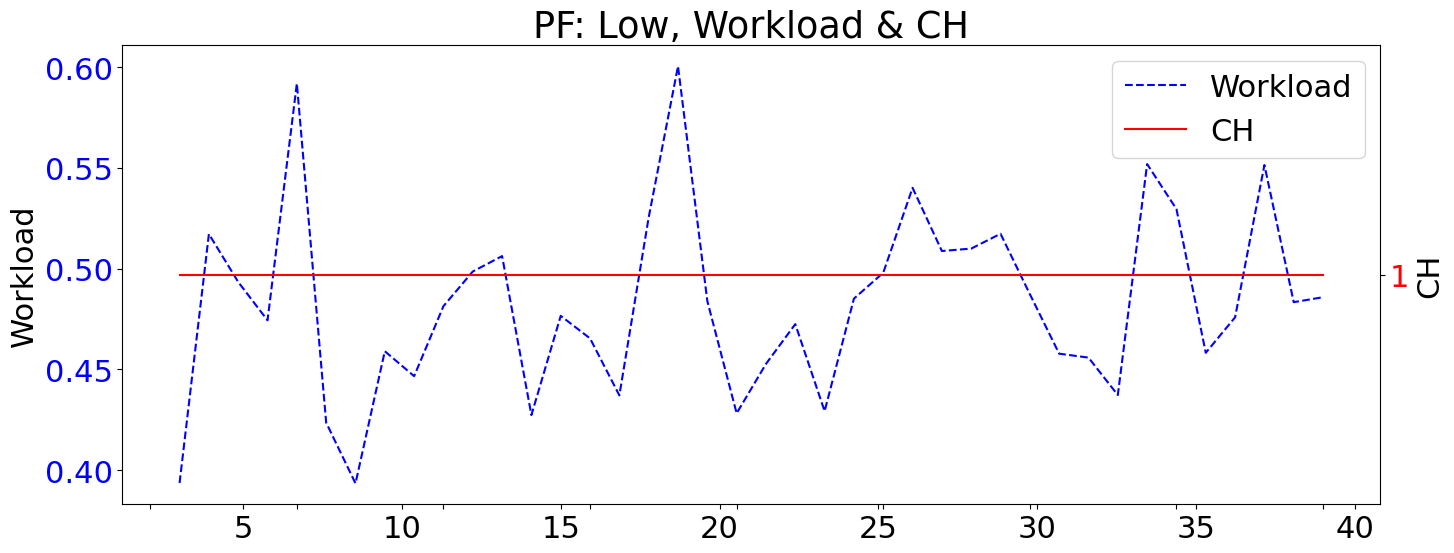

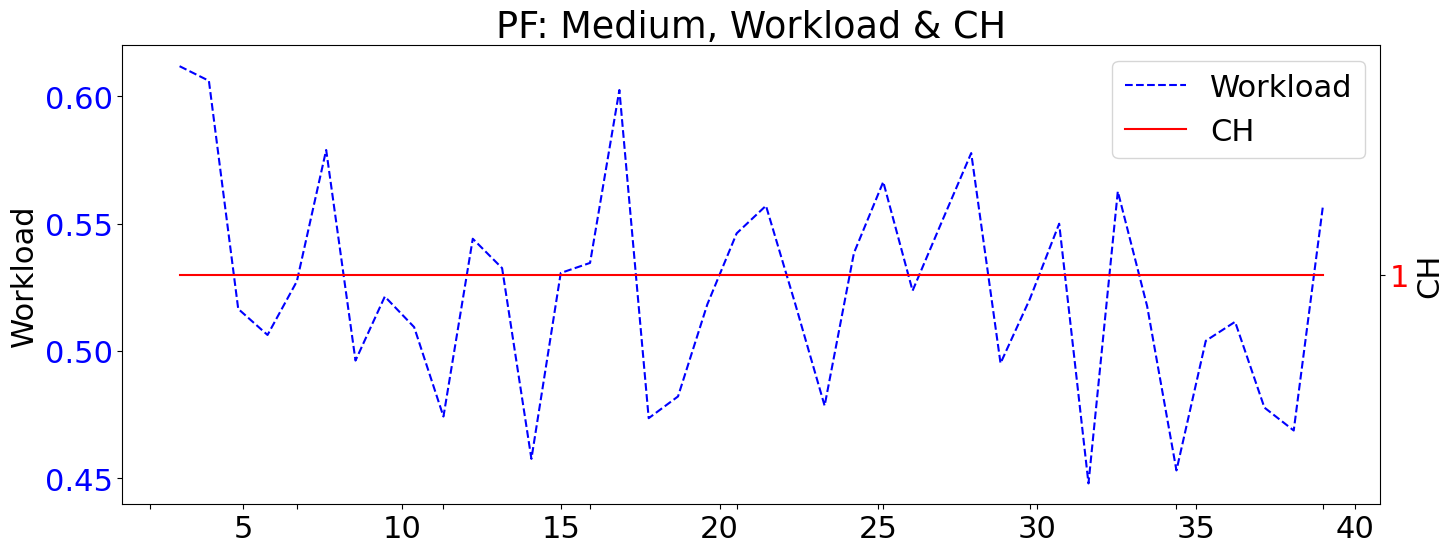

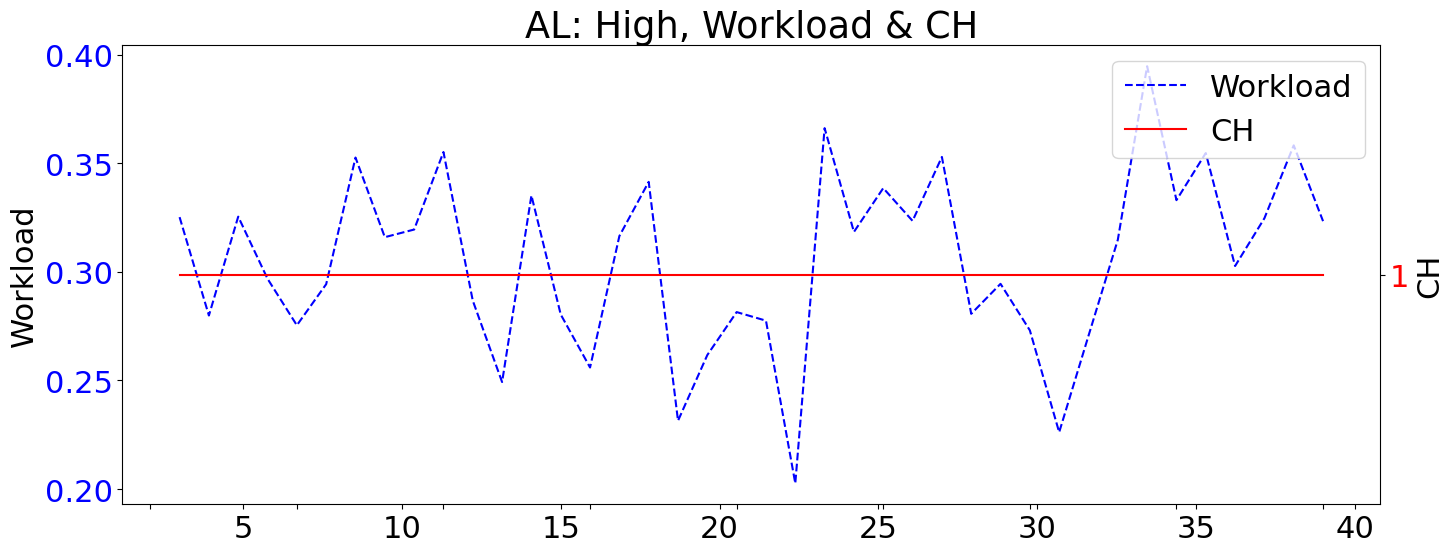

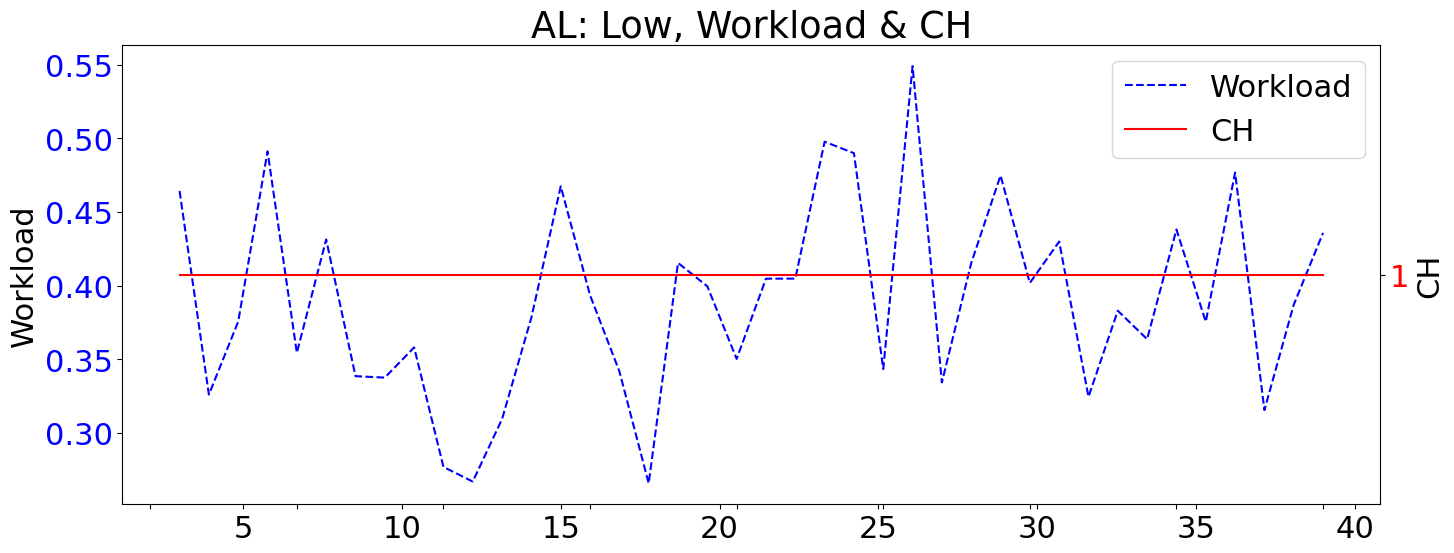

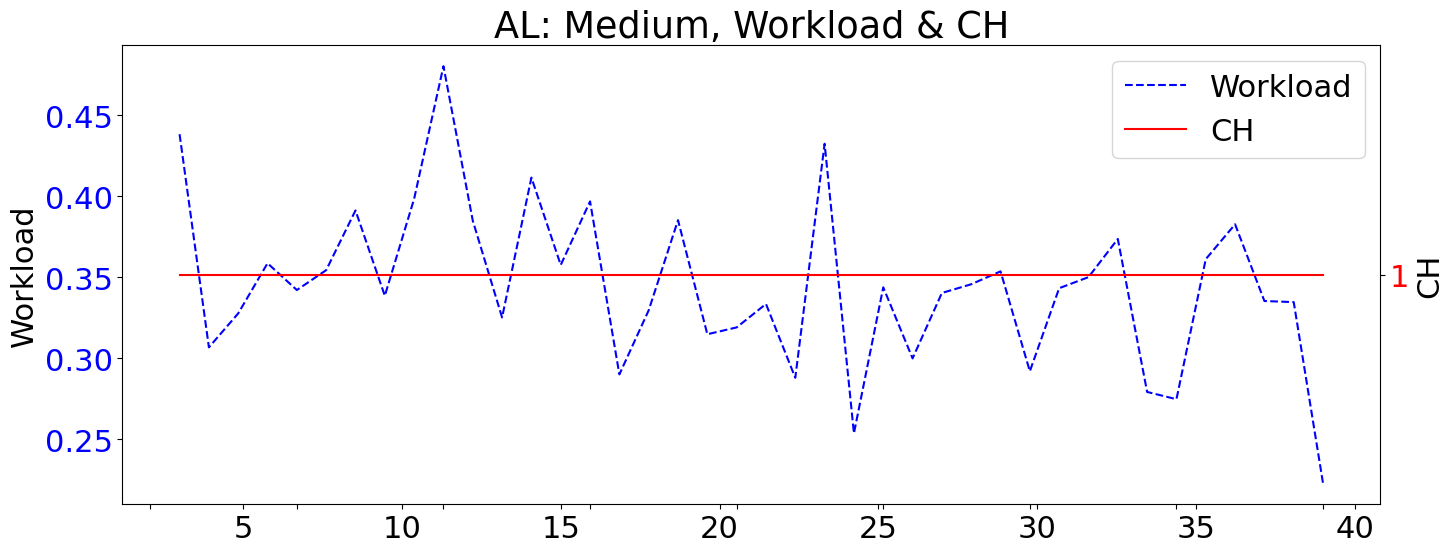

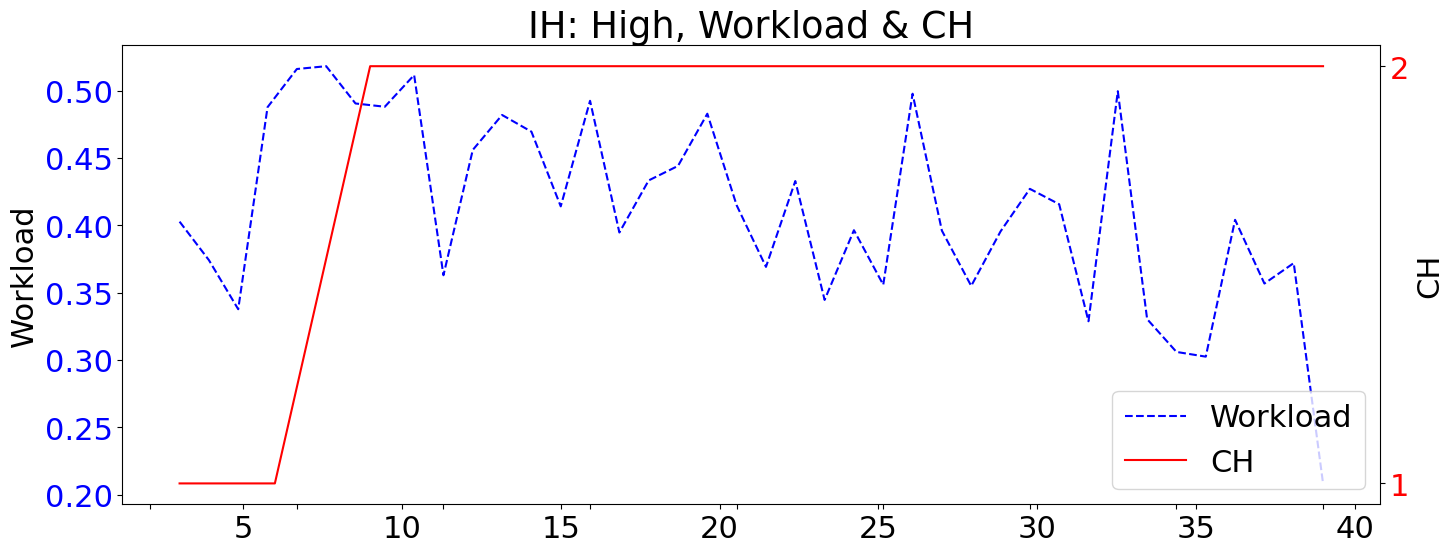

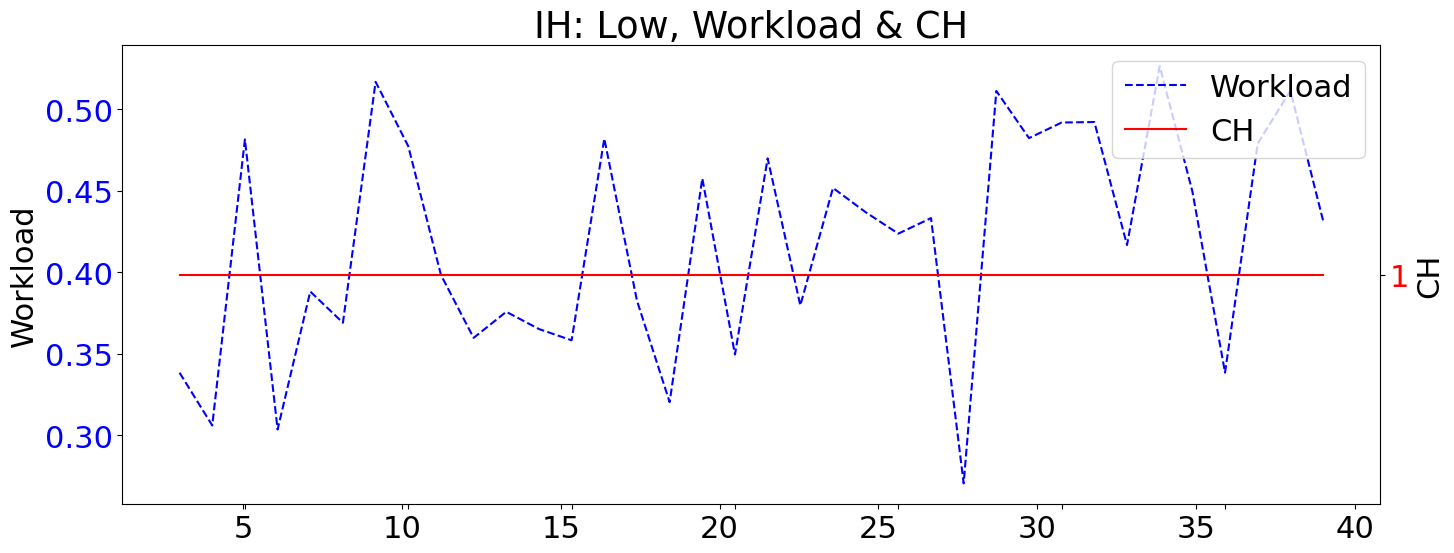

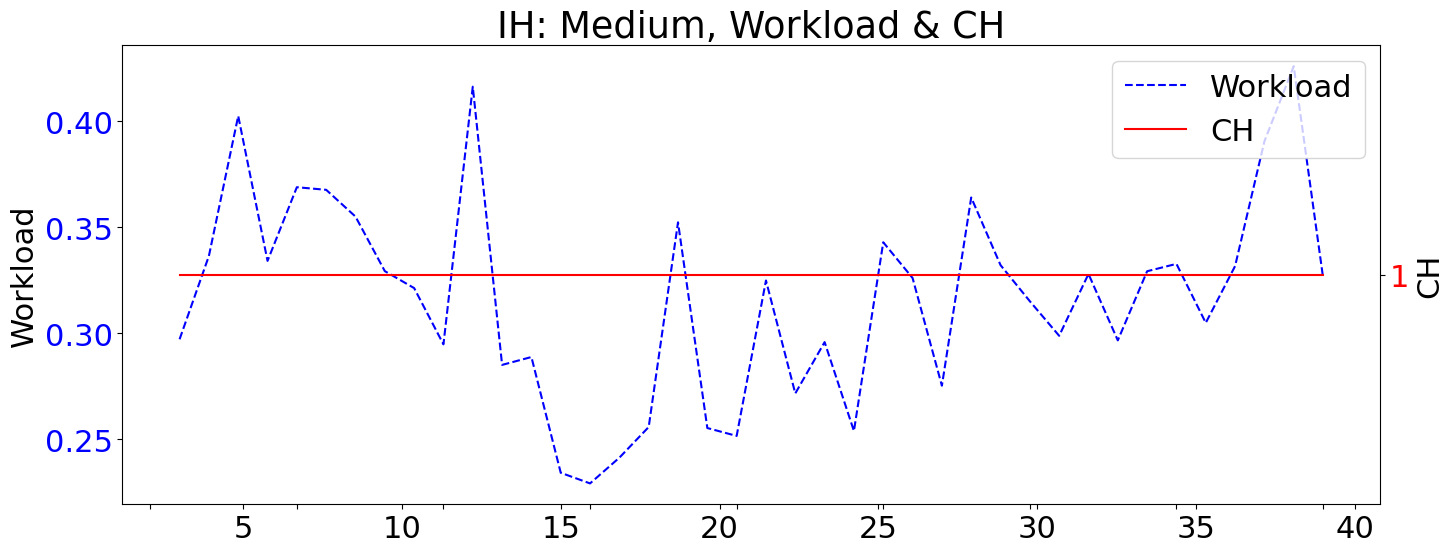

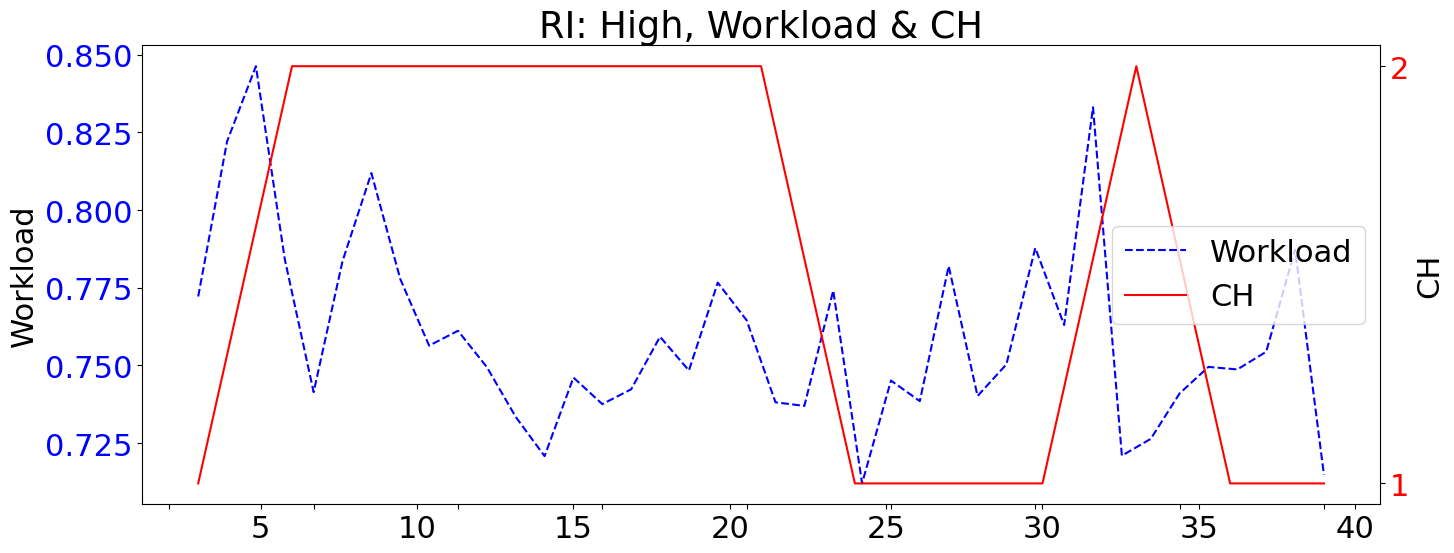

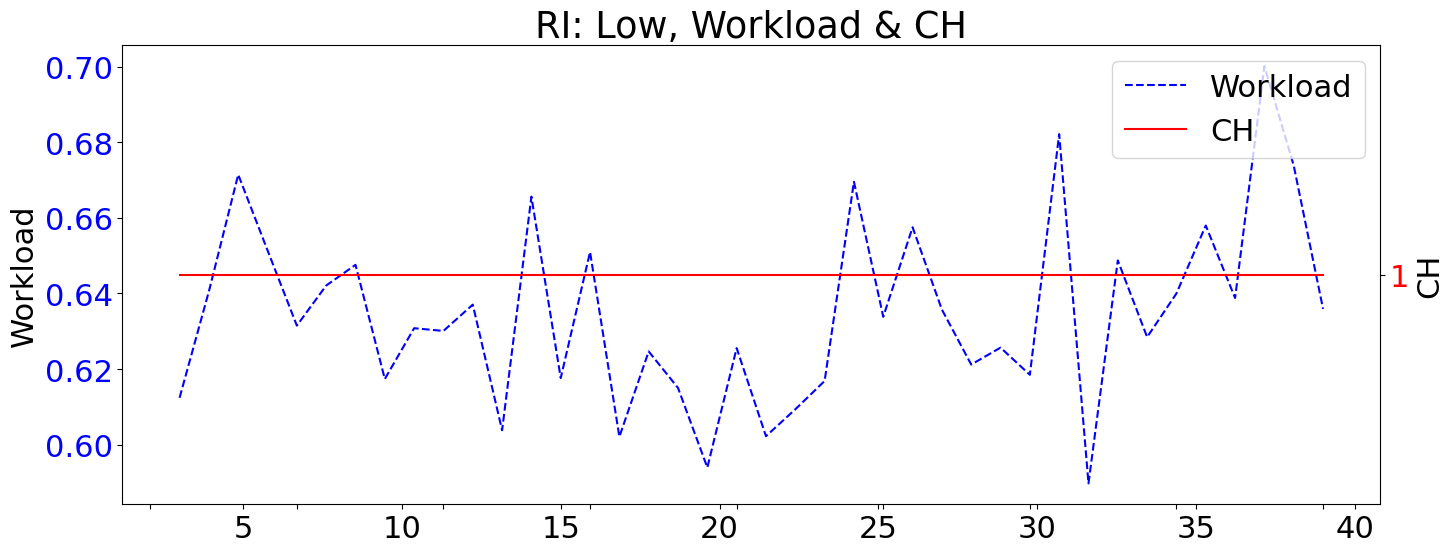

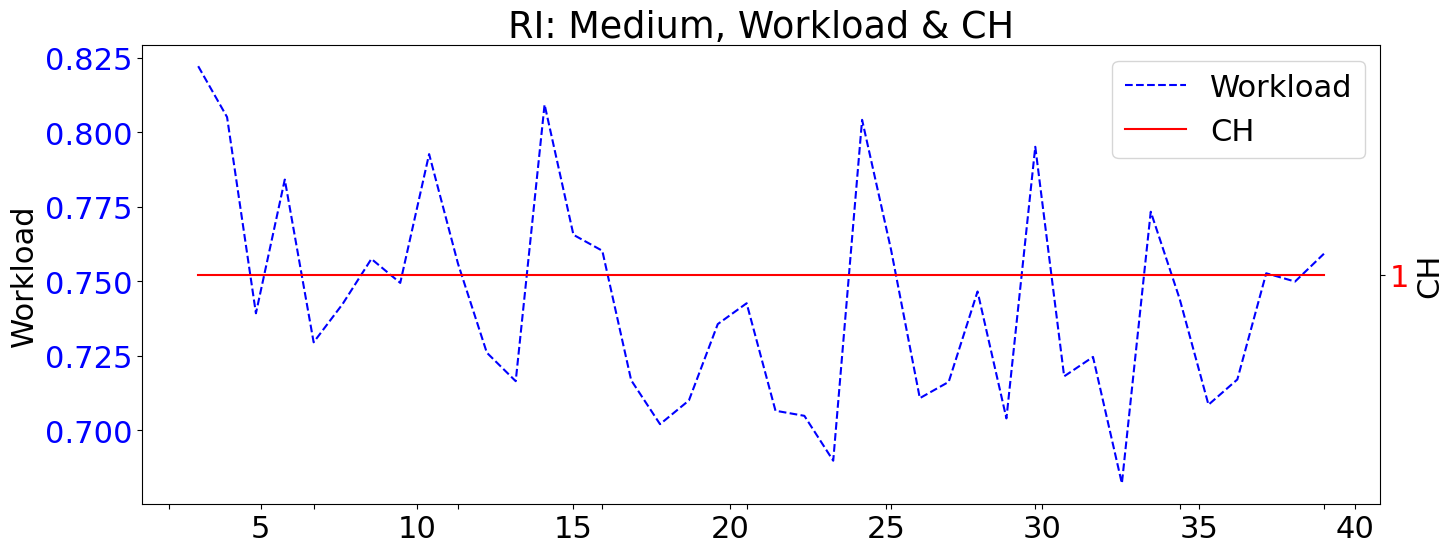

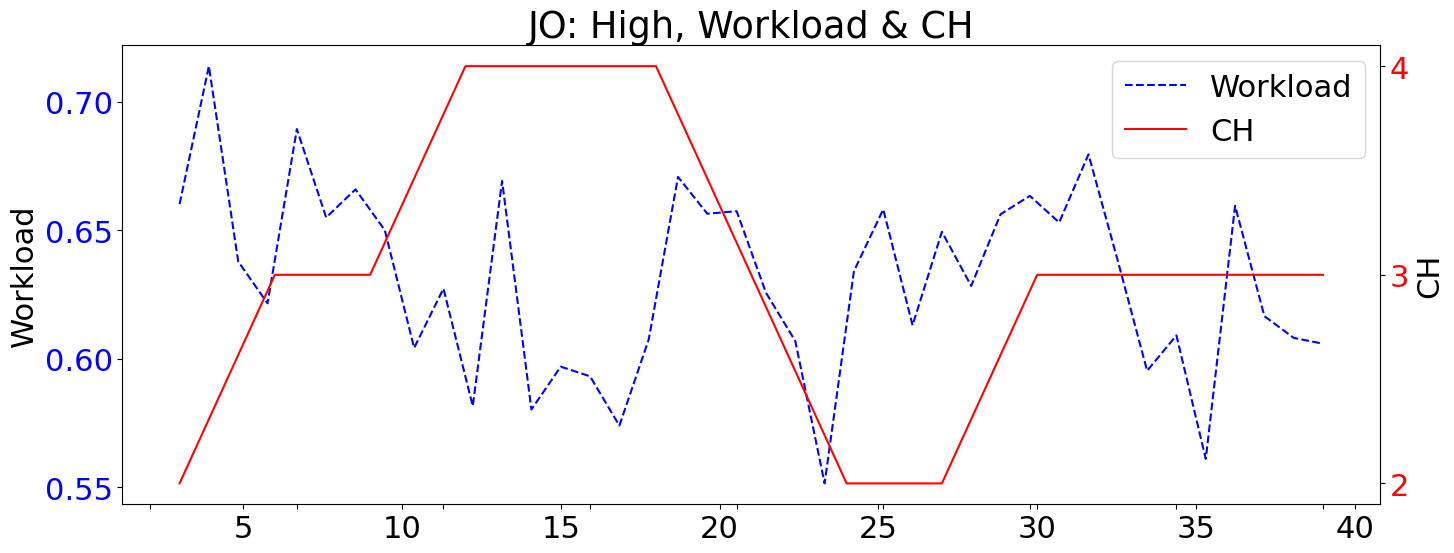

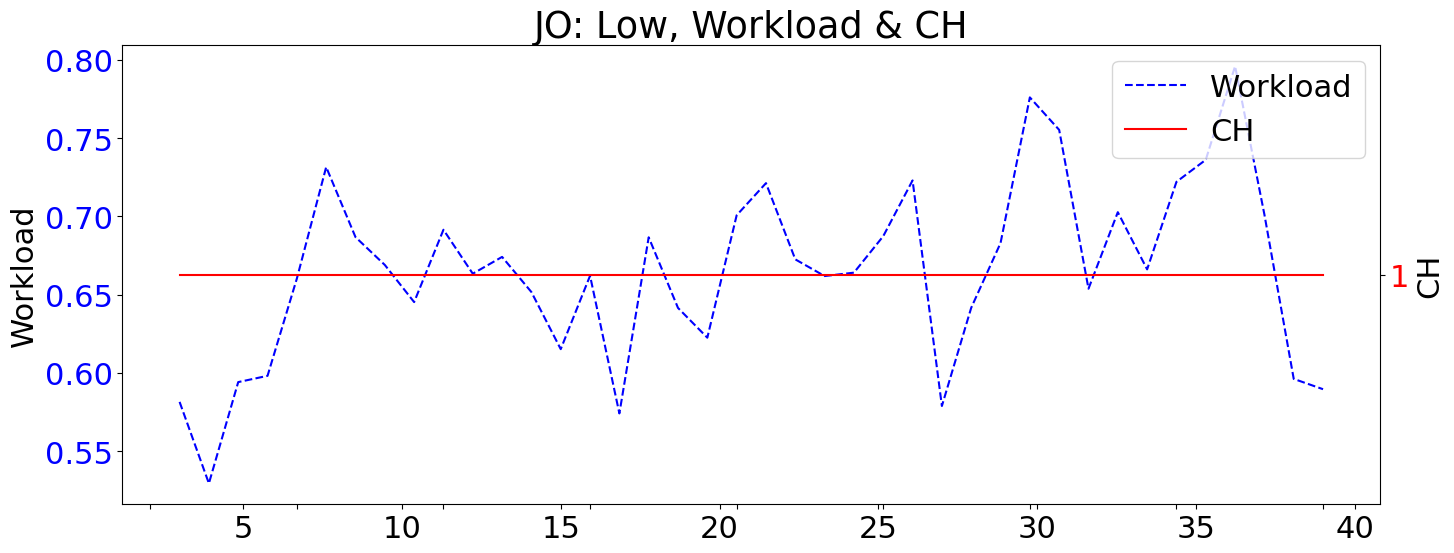

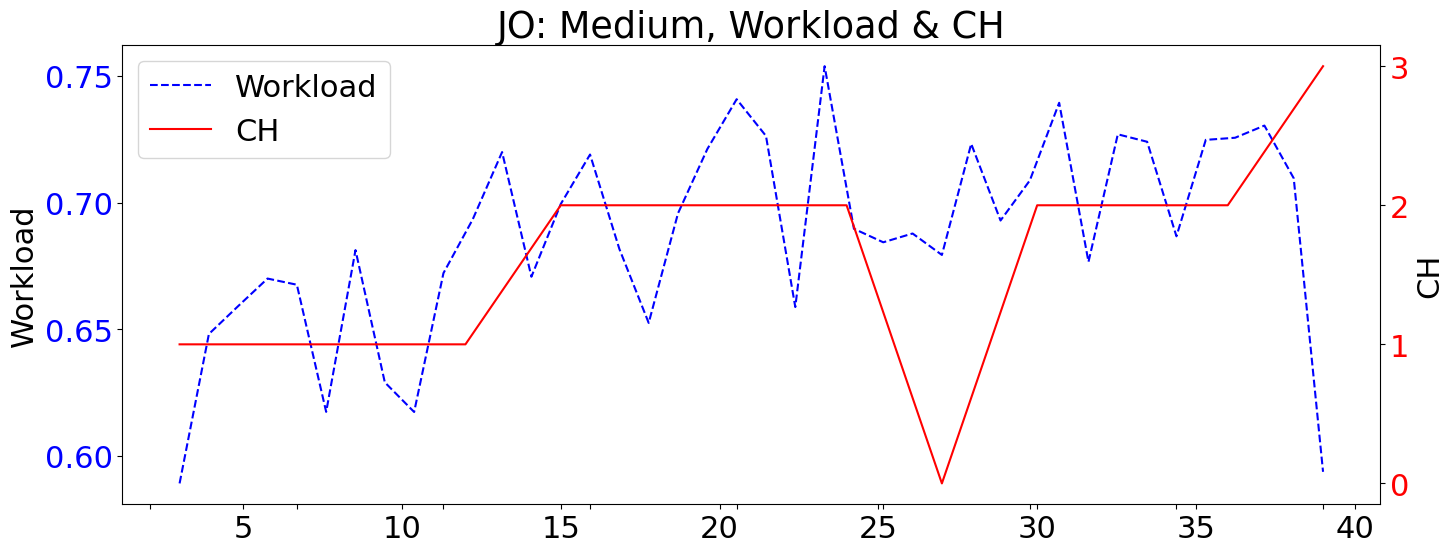

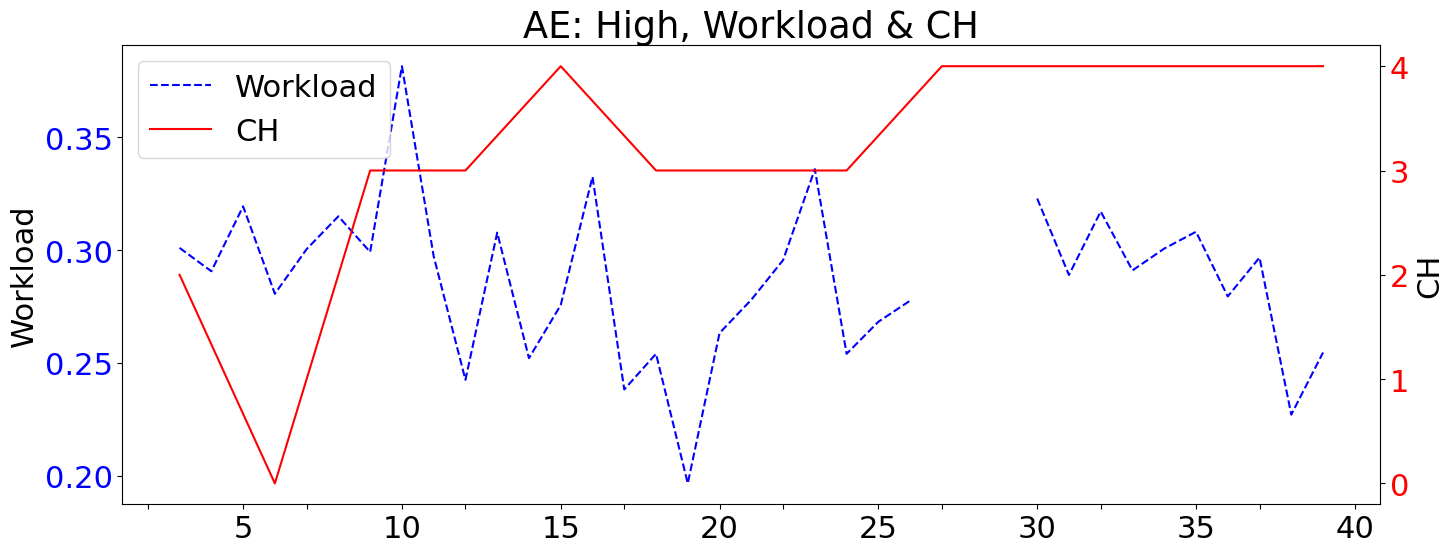

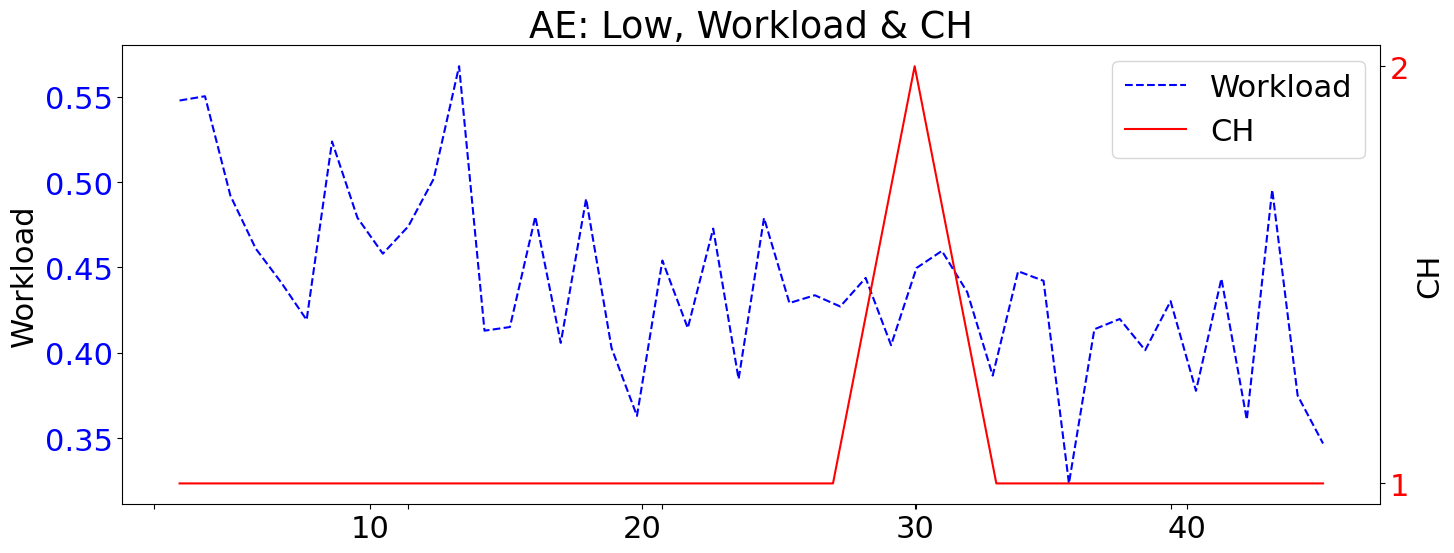

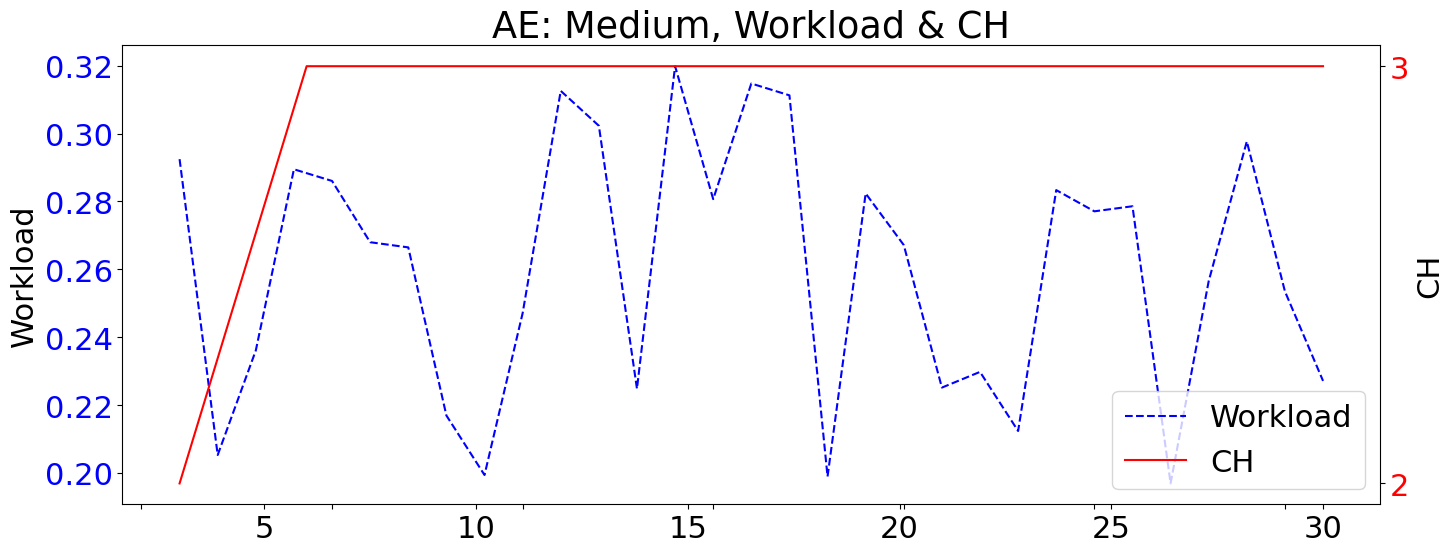

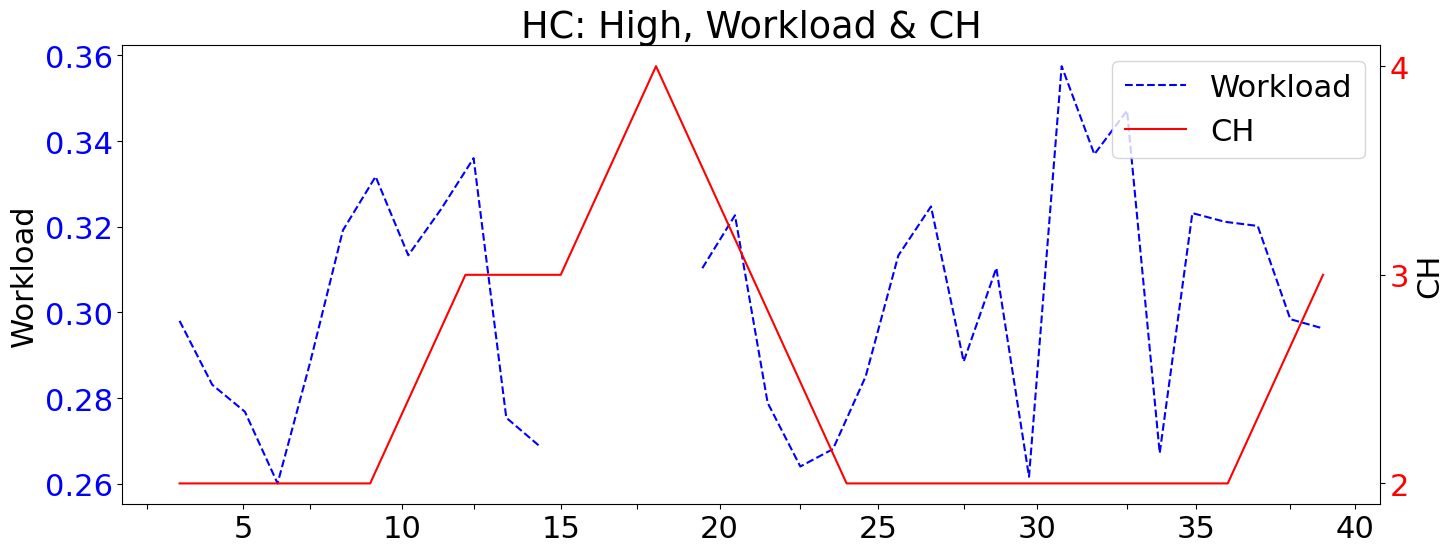

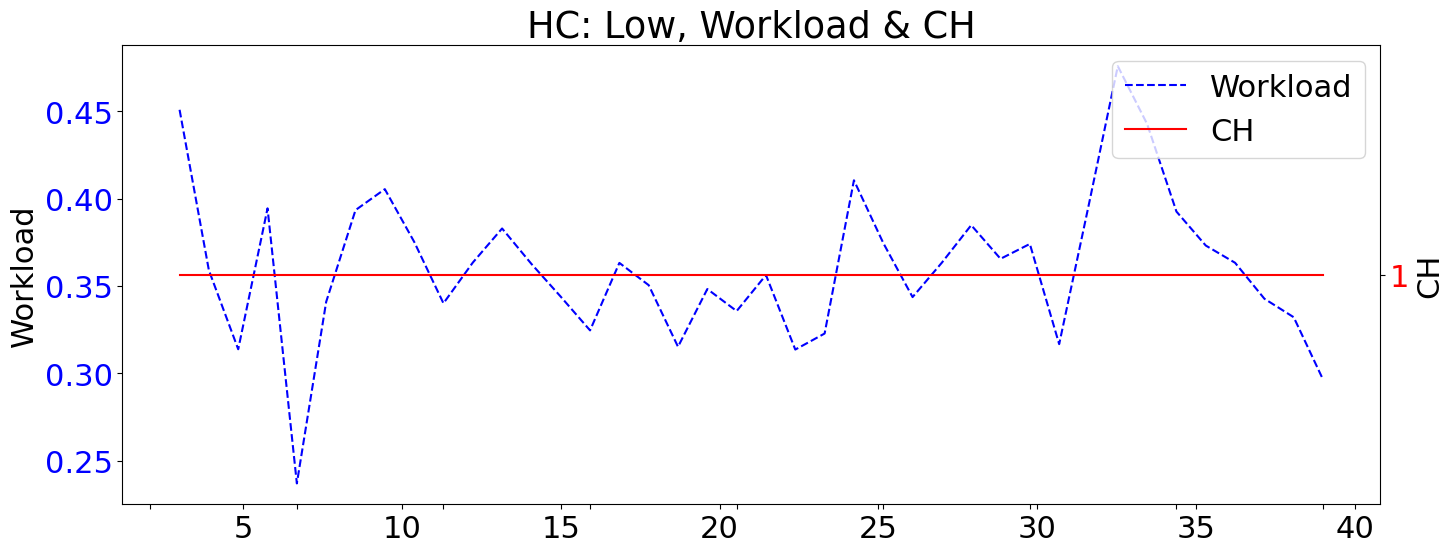

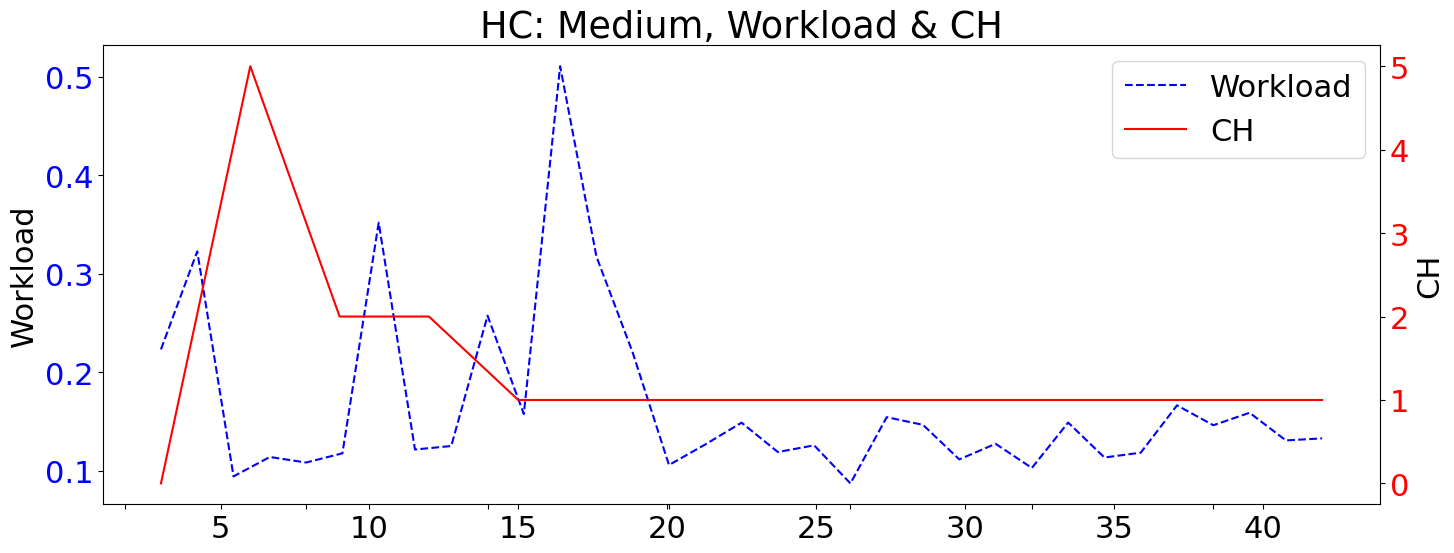

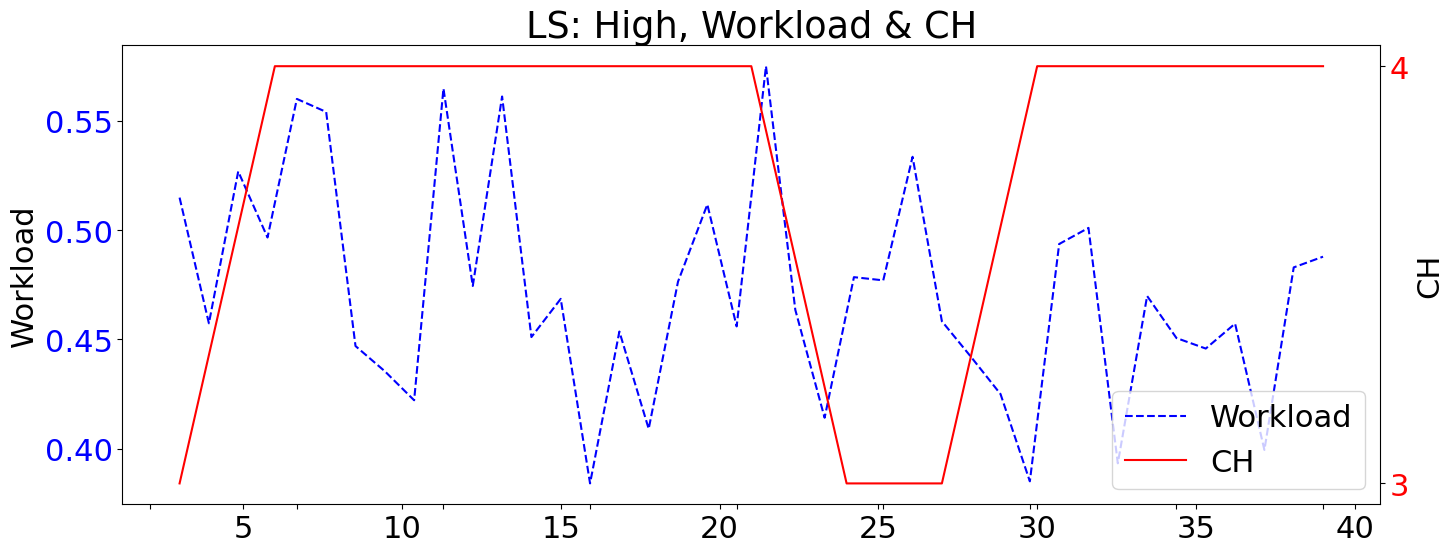

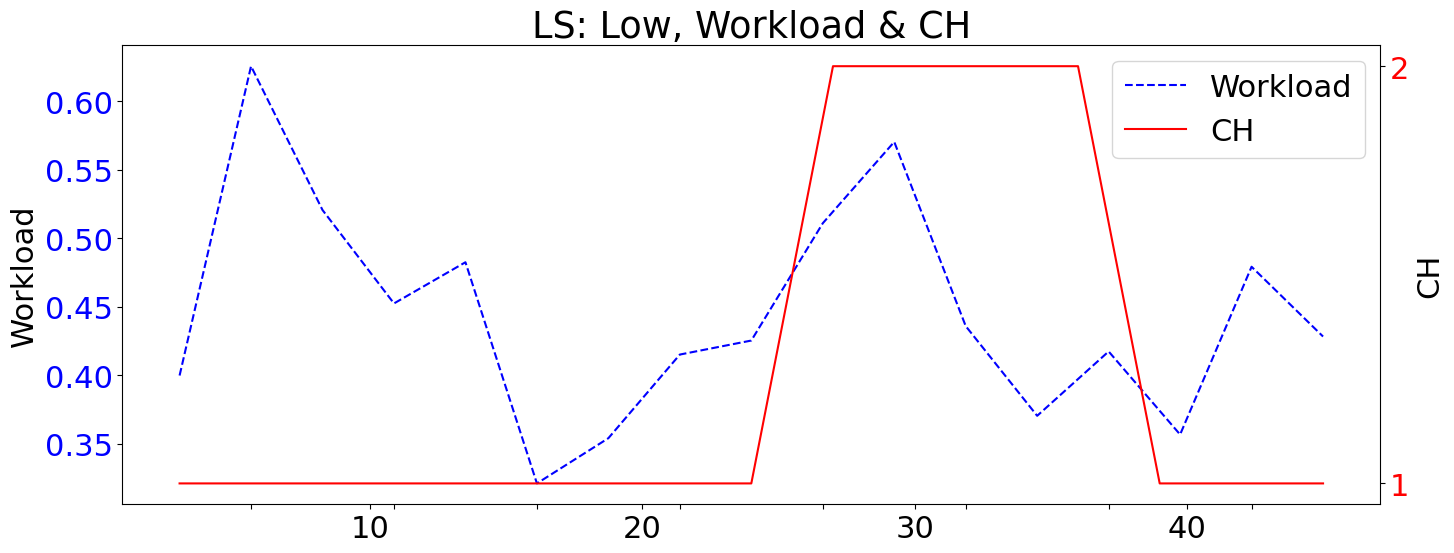

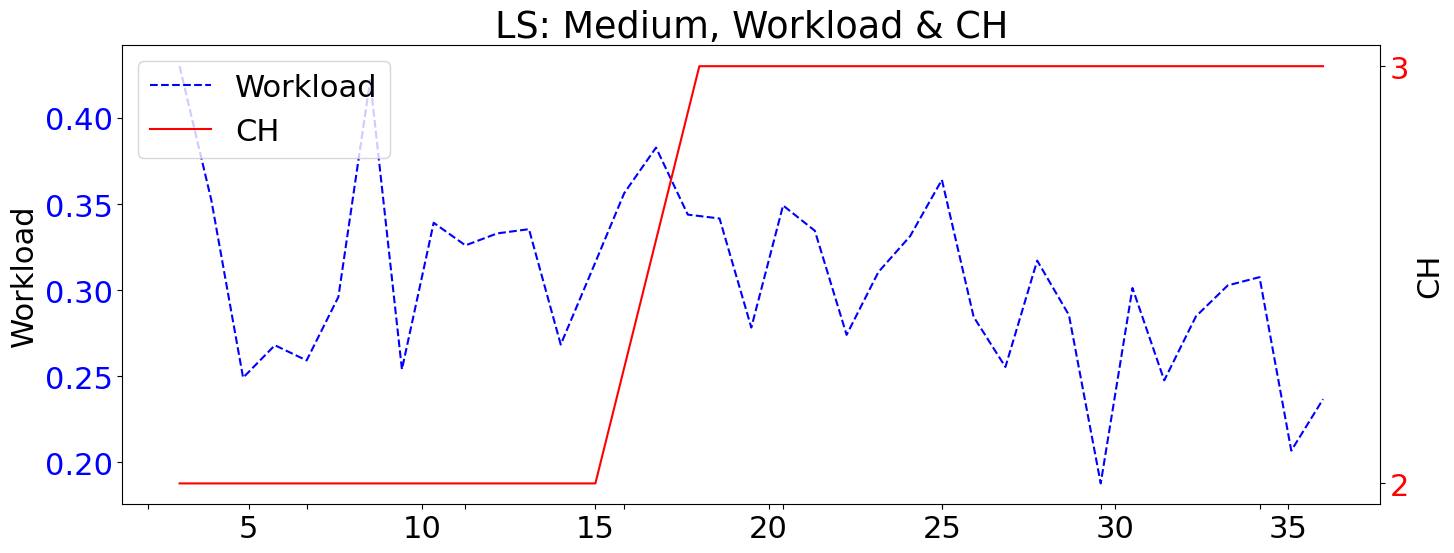

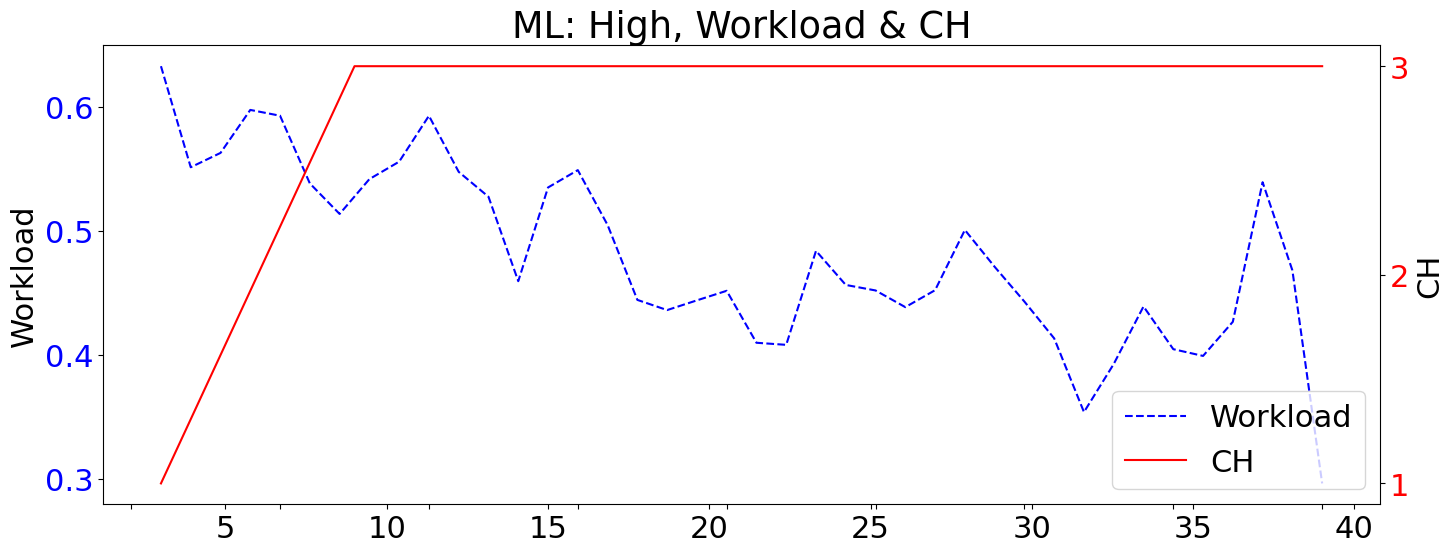

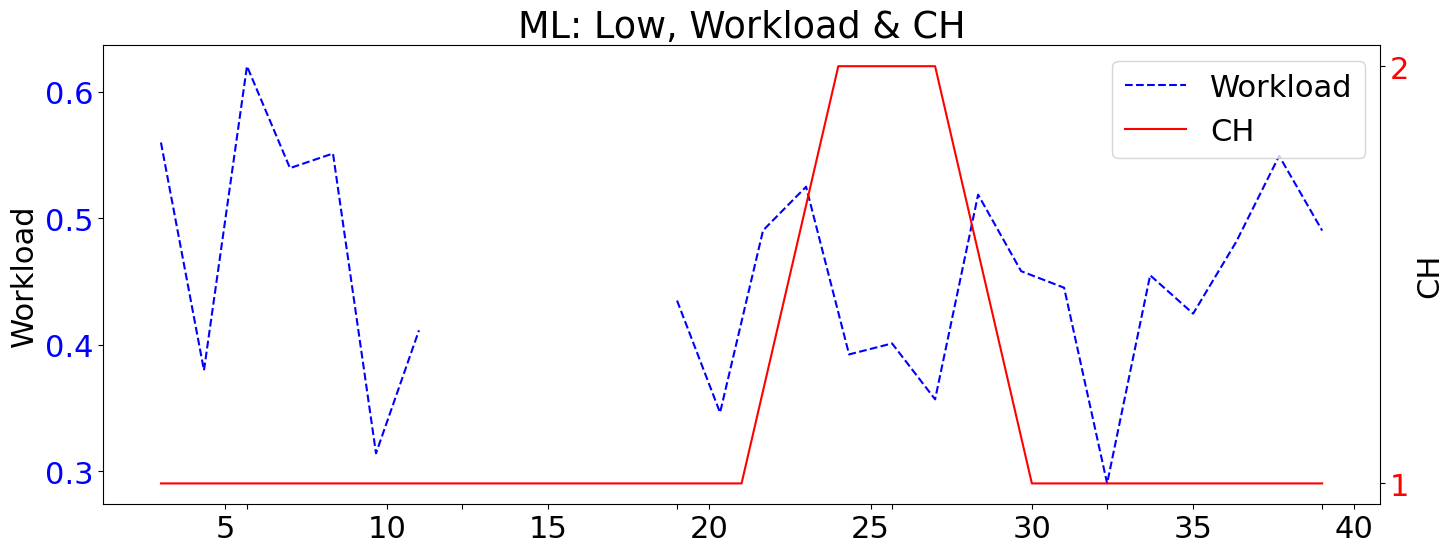

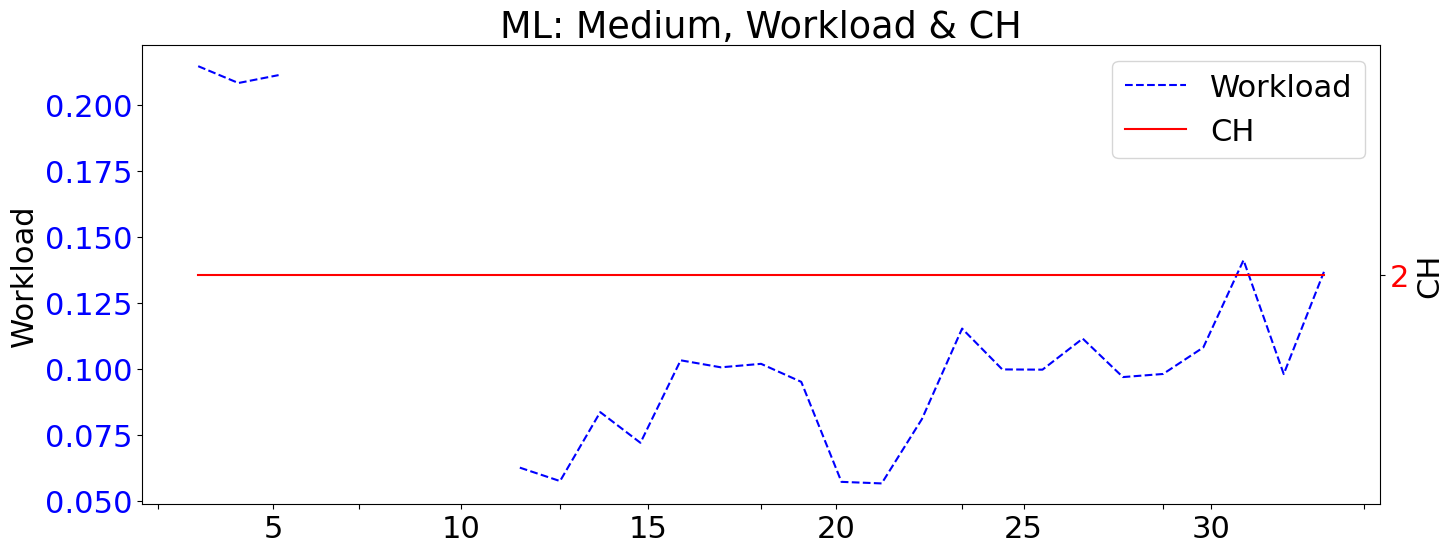

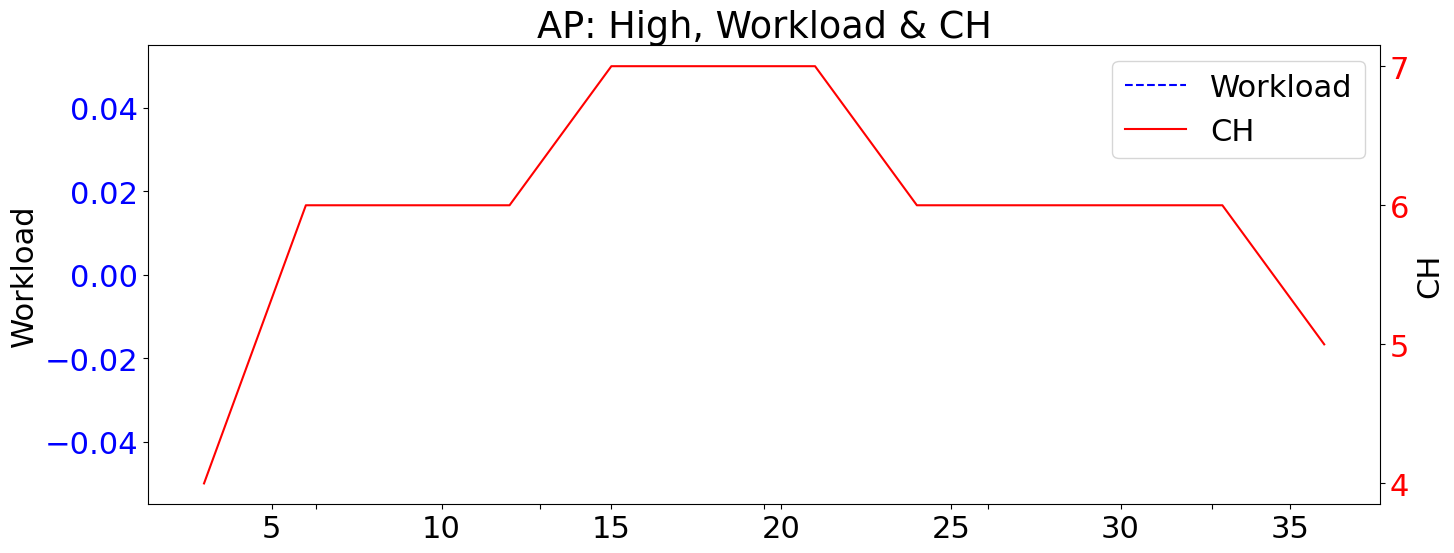

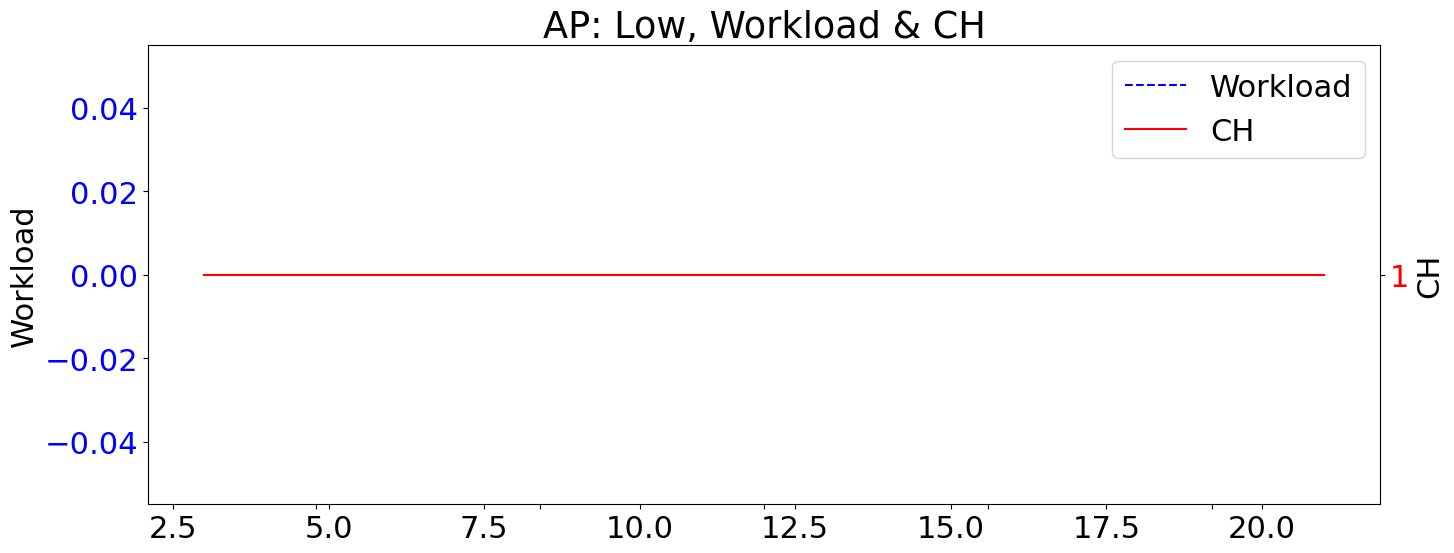

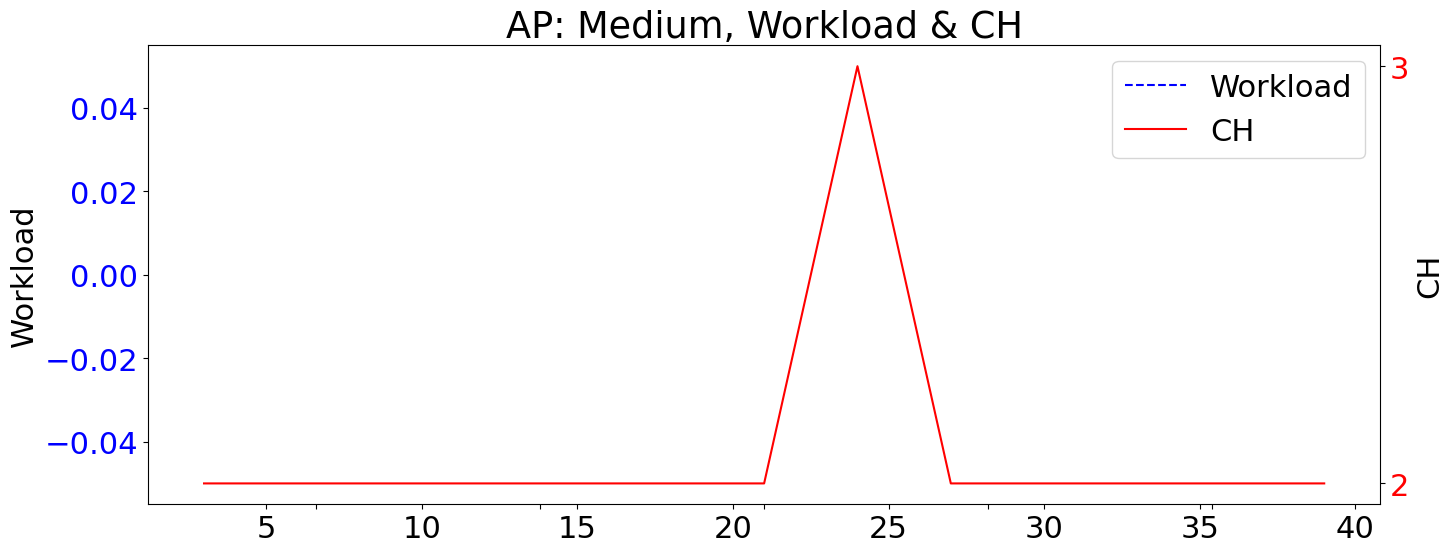

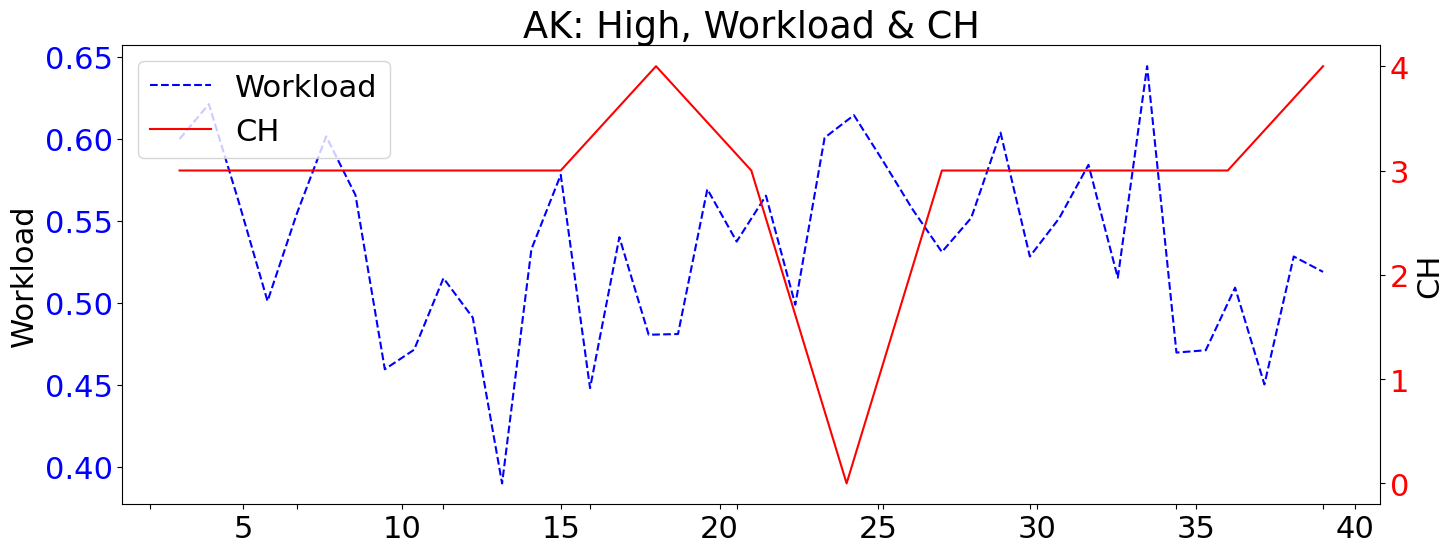

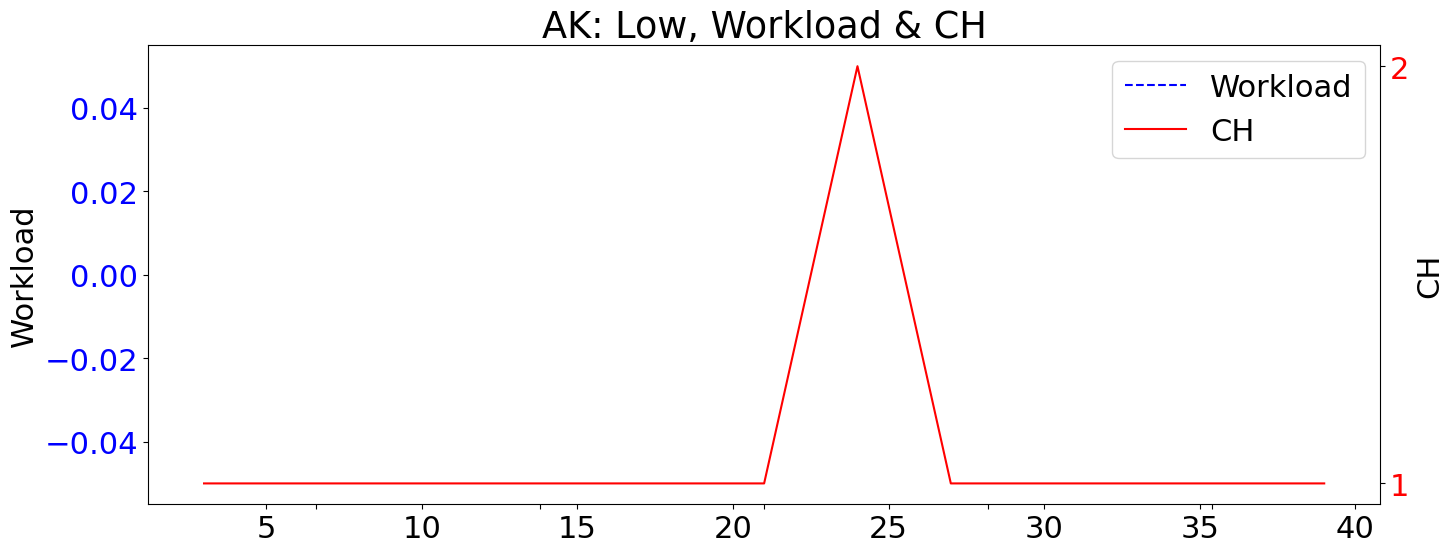

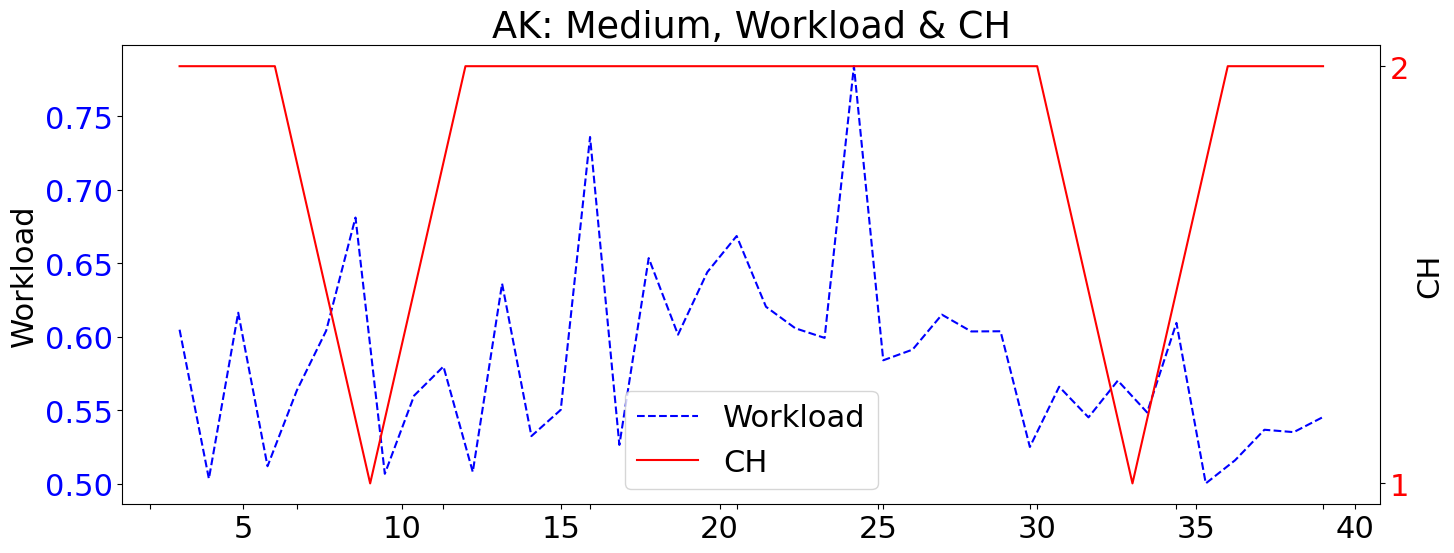

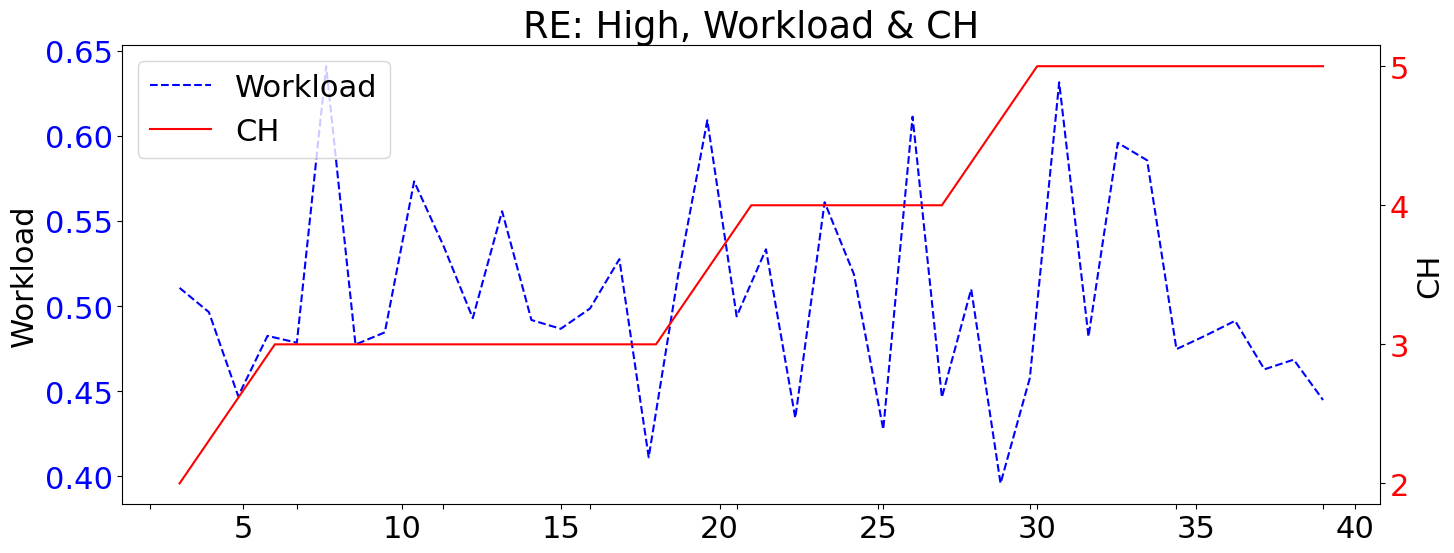

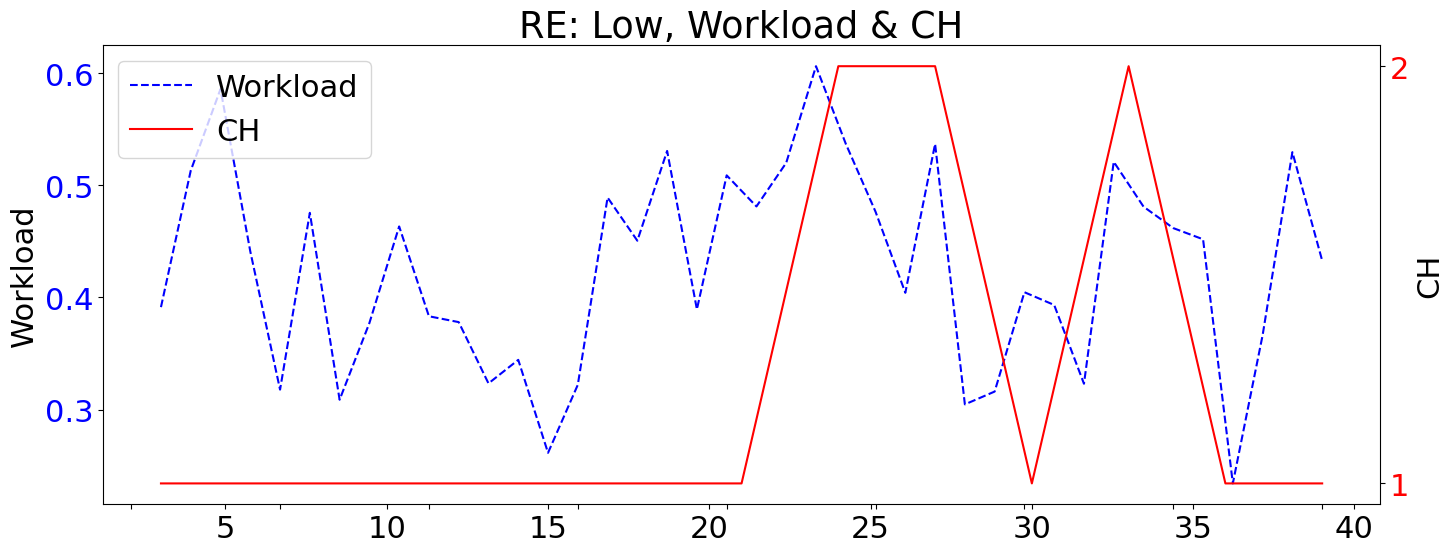

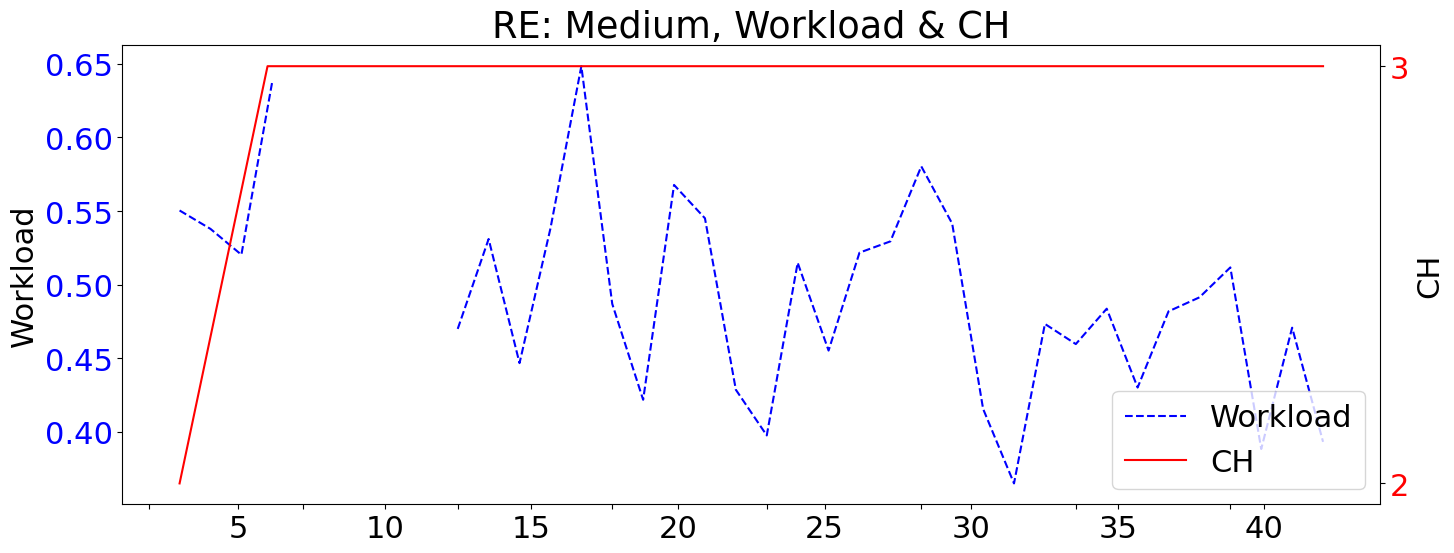

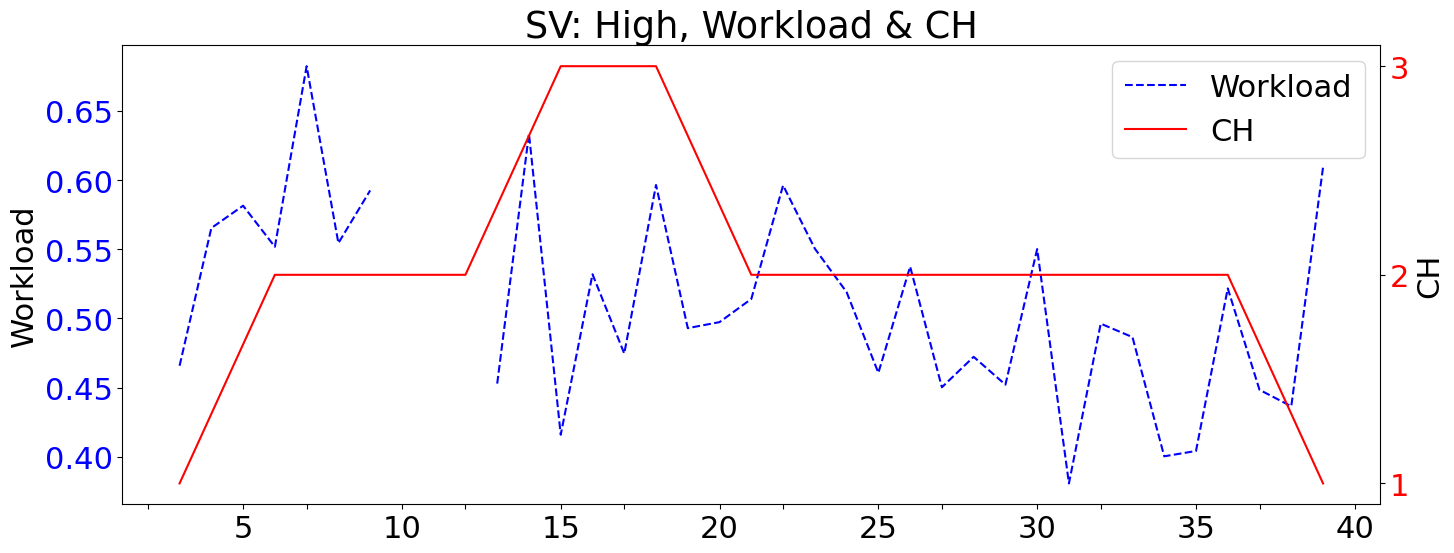

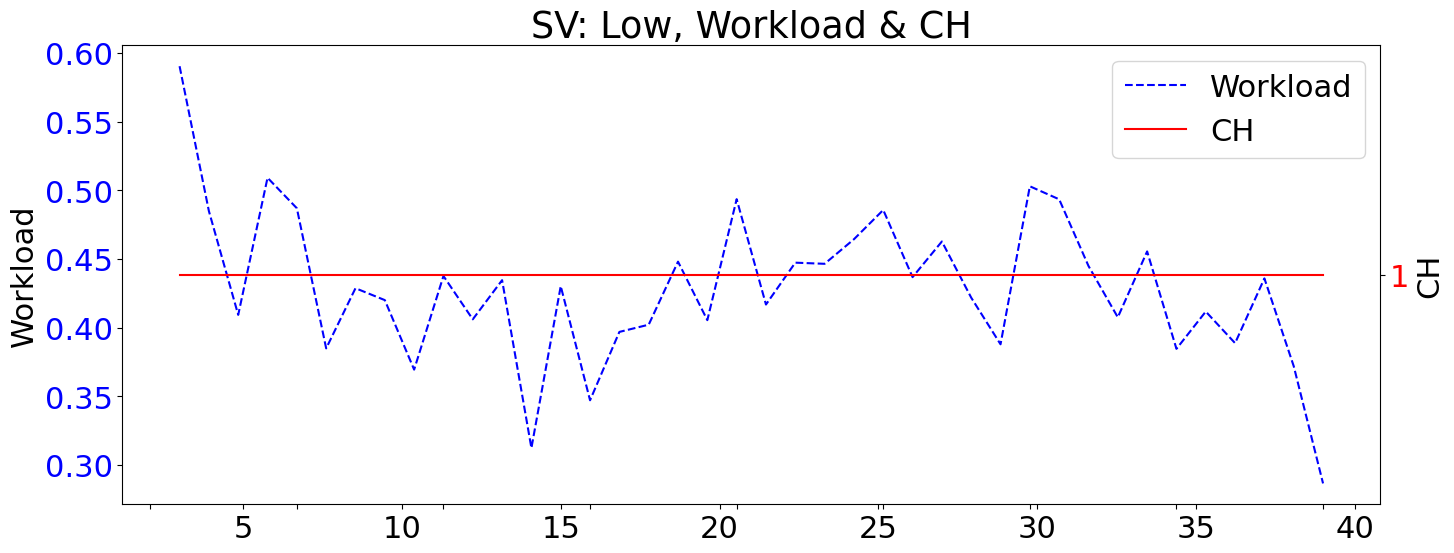

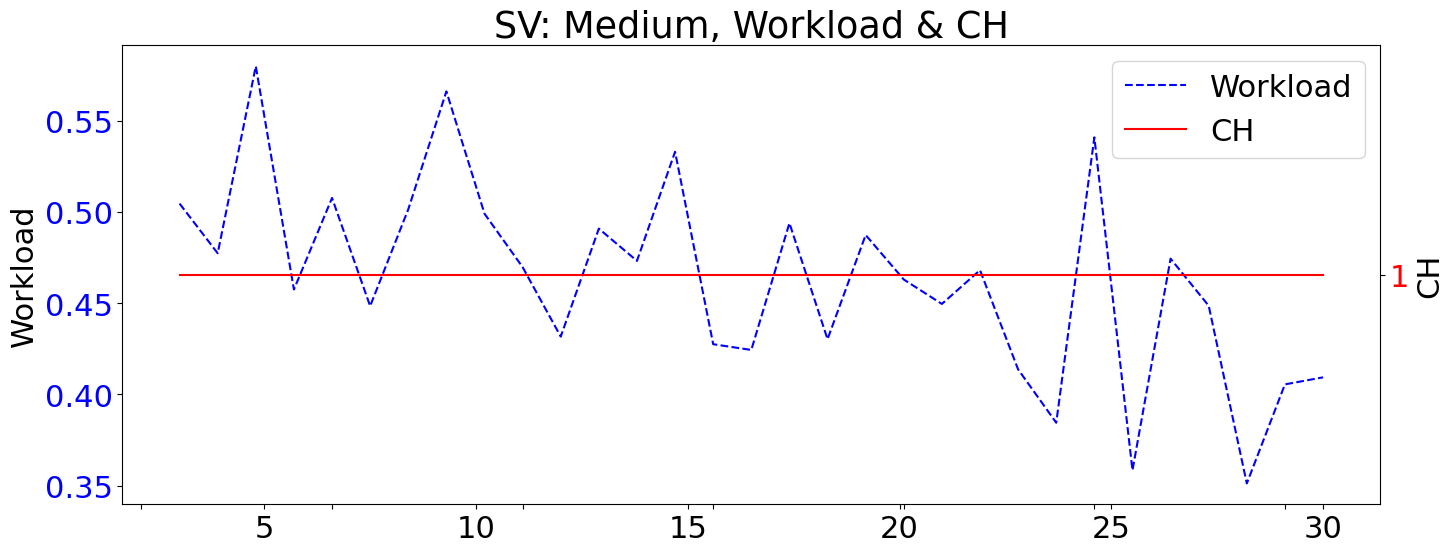

In [8]:
for key in run_dict:
    low_run = run_dict[key][0]
    high_run = run_dict[key][2]
    medium_run = run_dict[key][1]
    
    df_eeg_atco = df_eeg[df_eeg['ATCO']==key]
    df_ch_atco = df_ch[df_ch['ATCO']==key]
    
    df_eeg_high = df_eeg_atco[df_eeg_atco['Run']==high_run]
    df_ch_high = df_ch_atco[df_ch_atco['Run']==high_run]
    
    df_eeg_low = df_eeg_atco[df_eeg_atco['Run']==low_run]
    df_ch_low = df_ch_atco[df_ch_atco['Run']==low_run]

    df_eeg_medium = df_eeg_atco[df_eeg_atco['Run']==medium_run]
    df_ch_medium = df_ch_atco[df_ch_atco['Run']==medium_run]

    plot_eeg_ch(df_eeg_high, df_ch_high, "workload", "Workload_CH_high_" + key, key + ": High, Workload & CH")
    plot_eeg_ch(df_eeg_low, df_ch_low, "workload", "Workload_CH_low_" + key, key + ": Low, Workload & CH")
    plot_eeg_ch(df_eeg_medium, df_ch_medium, "workload", "Workload_CH_medium_" + key, key + ": Medium, Workload & CH")